# Climate Data Hierarchical Clustering

In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [2]:
# import scaled climate data
climate = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Machine Learning\Climate Data\Scaled Climate Data.csv')

In [34]:
# import scaled pleasantness data
pleasant = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Machine Learning\Climate Data\Weather Predictions.csv')

In [4]:
climate.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0           0.660514          -0.02793        0.826097       -0.001949   
1           0.244897          -0.02793        0.735760       -0.001949   
2           1.076130          -0.02793        1.277781       -0.001949   
3          -1.001953          -0.02793        1.458455       -0.001949   
4           0.244897          -0.02793        1.729466       -0.001949   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0               -1.101066            -0.265148         -0.179228   
1               -1.058108             1.658760         -0.179228   
2               -1.251420             0.155707         -0.179228   
3               -0.821838            -0.445514         -0.179228   
4               -0.746661            -0.164944         -0.179228   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_pressure  \
0       -0.902918        -0.528623       -0.845652  ...          -1.299744   
1       -0.810126        -0.582946       -0.462450  ...          -1.262455   
2       -1.065304        -0.257010       -0.186545  ...          -0.432779   
3       -0.114186        -0.555784       -0.385810  ...           0.387574   
4        0.187388        -1.003946       -1.075573  ...           1.729970   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
0                  -0.806427               -0.088407            -0.024706   
1                  -1.042055                0.503361            -0.024706   
2                  -1.136306               -0.396127            -0.024706   
3                  -1.183432                0.669056            -0.024706   
4                  -0.794645               -0.490810            -0.024706   

   VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
0           0.372147           -0.668215          -0.519743   
1          -0.829285           -0.548046          -0.629054   
2          -1.009500           -0.067372           0.054135   
3          -1.039536           -0.998679          -0.164486   
4           0.672505           -1.509396          -1.339569   

   VALENTIA_temp_max      Date  Month  
0          -0.752237  19600101      1  
1          -0.407141  19600102      1  
2          -0.177078  19600103      1  
3          -0.838511  19600104      1  
4          -1.471186  19600105      1  

[5 rows x 170 columns]

In [5]:
decade10 = climate[climate['Date'].astype(str).str.startswith('201')]
decade10.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
18263           1.076130          0.245067        1.548792       -3.288021   
18264          -1.001953          1.200556       -0.167609        0.196744   
18265          -1.001953         -0.573924       -0.077273        0.701118   
18266          -0.170720         -1.529413        0.645423       -0.170073   
18267           0.660514         -0.983419        0.193738       -1.637343   

       BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
18263               -1.251420             0.676766         -0.179228   
18264               -0.821838            -0.445514          0.319230   
18265               -0.789619            -0.445514         -0.179228   
18266               -0.929233            -0.445514         -0.179228   
18267               -0.875535            -0.365351         -0.179228   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
18263       -1.065304        -1.017527       -0.998933  ...   
18264        0.140992        -1.615075       -1.612055  ...   
18265        0.396170        -1.845947       -1.887961  ...   
18266       -0.206978        -2.076818       -2.240506  ...   
18267       -0.044592        -1.954592       -2.056569  ...   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
18263          -0.199725                  -0.829990               -0.490810   
18264           0.499440                  -0.806427               -0.490810   
18265           0.499440                  -0.912459               -0.005560   
18266           0.713851                  -0.771082                0.112794   
18267          -0.237013                  -0.806427               -0.384292   

       VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
18263            -0.024706           0.762612           -2.711082   
18264            -0.024706           0.762612           -2.981462   
18265            -0.024706          -0.558963           -3.071588   
18266            -0.024706           0.912791           -2.110239   
18267            -0.024706           0.372147           -2.530829   

       VALENTIA_temp_min  VALENTIA_temp_max      Date  Month  
18263          -2.596636          -2.448957  20100101      1  
18264          -3.389134          -2.103861  20100102      1  
18265          -3.279824          -2.420199  20100103      1  
18266          -1.804137          -2.794053  20100104      1  
18267          -2.350688          -2.333925  20100105      1  

[5 rows x 170 columns]

In [6]:
decade10.shape

(3652, 170)

In [7]:
pleasant.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [8]:
# select only values for 2010's and drop the date and month column
decade10 = climate[climate['Date'].astype(str).str.startswith('201')]
decade10.drop(['Date', 'Month'], axis = 1, inplace = True)
decade10.head()

C:\Users\kacie\AppData\Local\Temp\ipykernel_22236\1676202955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade10.drop(['Date', 'Month'], axis = 1, inplace = True)


BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
18263           1.076130          0.245067        1.548792       -3.288021   
18264          -1.001953          1.200556       -0.167609        0.196744   
18265          -1.001953         -0.573924       -0.077273        0.701118   
18266          -0.170720         -1.529413        0.645423       -0.170073   
18267           0.660514         -0.983419        0.193738       -1.637343   

       BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
18263               -1.251420             0.676766         -0.179228   
18264               -0.821838            -0.445514          0.319230   
18265               -0.789619            -0.445514         -0.179228   
18266               -0.929233            -0.445514         -0.179228   
18267               -0.875535            -0.365351         -0.179228   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
18263       -1.065304        -1.017527       -0.998933  ...   
18264        0.140992        -1.615075       -1.612055  ...   
18265        0.396170        -1.845947       -1.887961  ...   
18266       -0.206978        -2.076818       -2.240506  ...   
18267       -0.044592        -1.954592       -2.056569  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
18263             -2.897272          -0.363113          -0.199725   
18264             -2.897272          -0.081896           0.499440   
18265             -1.057093          -1.628588           0.499440   
18266             -2.283879          -2.191022           0.713851   
18267             -1.057093          -0.644330          -0.237013   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
18263                  -0.829990               -0.490810            -0.024706   
18264                  -0.806427               -0.490810            -0.024706   
18265                  -0.912459               -0.005560            -0.024706   
18266                  -0.771082                0.112794            -0.024706   
18267                  -0.806427               -0.384292            -0.024706   

       VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
18263           0.762612           -2.711082          -2.596636   
18264           0.762612           -2.981462          -3.389134   
18265          -0.558963           -3.071588          -3.279824   
18266           0.912791           -2.110239          -1.804137   
18267           0.372147           -2.530829          -2.350688   

       VALENTIA_temp_max  
18263          -2.448957  
18264          -2.103861  
18265          -2.420199  
18266          -2.794053  
18267          -2.333925  

[5 rows x 168 columns]

In [9]:
decade10.shape

(3652, 168)

## Hierarchical Clustering for 2010's Data

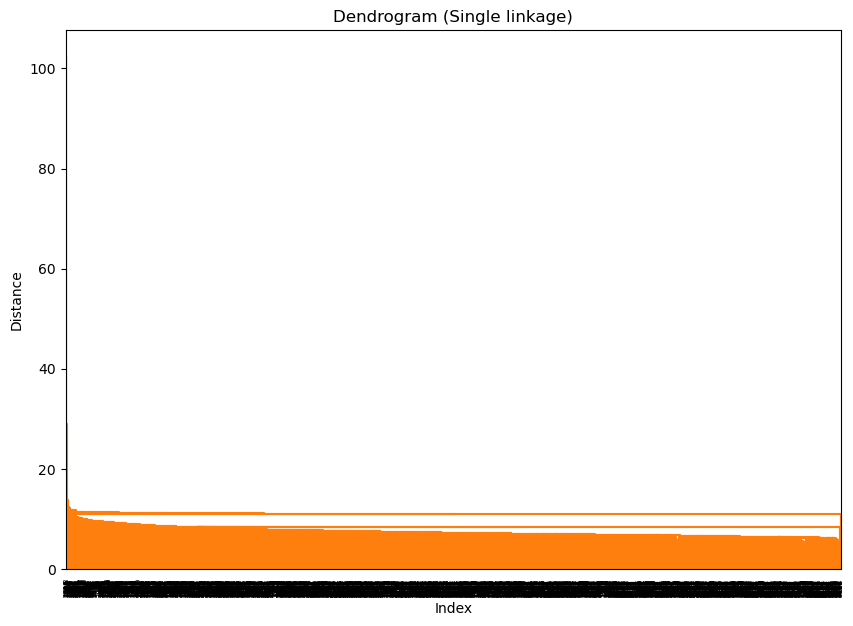

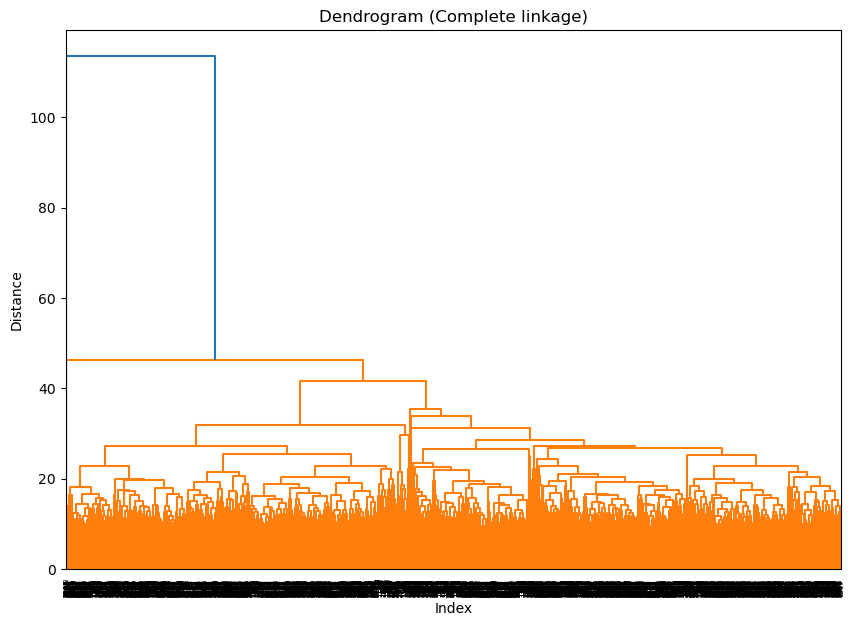

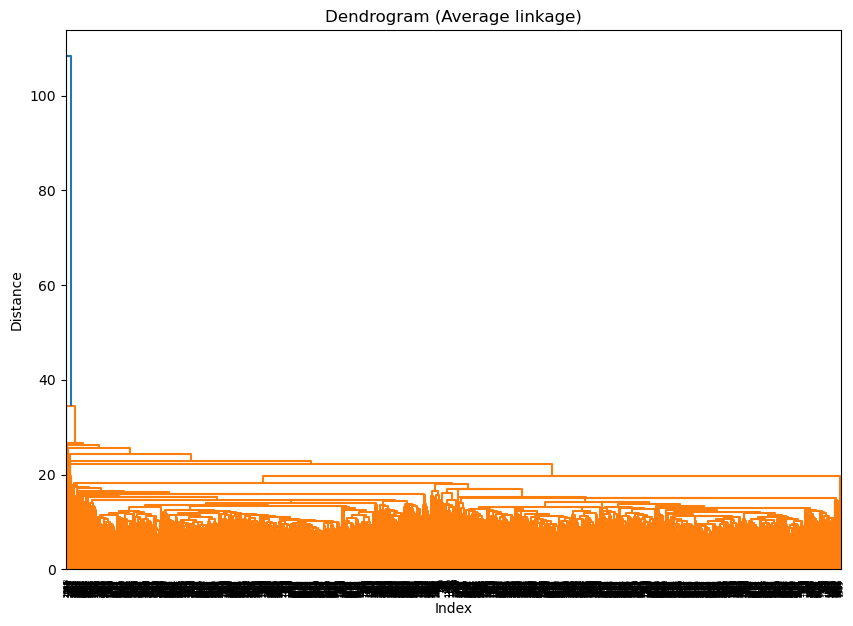

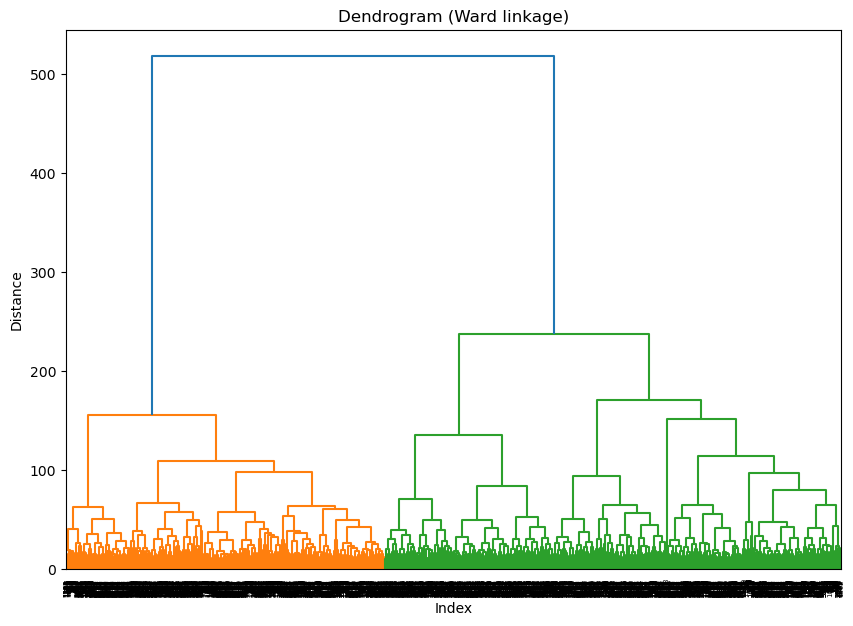

In [10]:
# Perform hierarchical clustering on 2010s data
# Define the linkage methods
methods = ['single', 'complete', 'average', 'ward']

for method in methods:
    Z = linkage(decade10, method=method)
    
    plt.figure(figsize=(10, 7))
    plt.title(f'Dendrogram ({method.capitalize()} linkage)')
    dendrogram(Z)
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

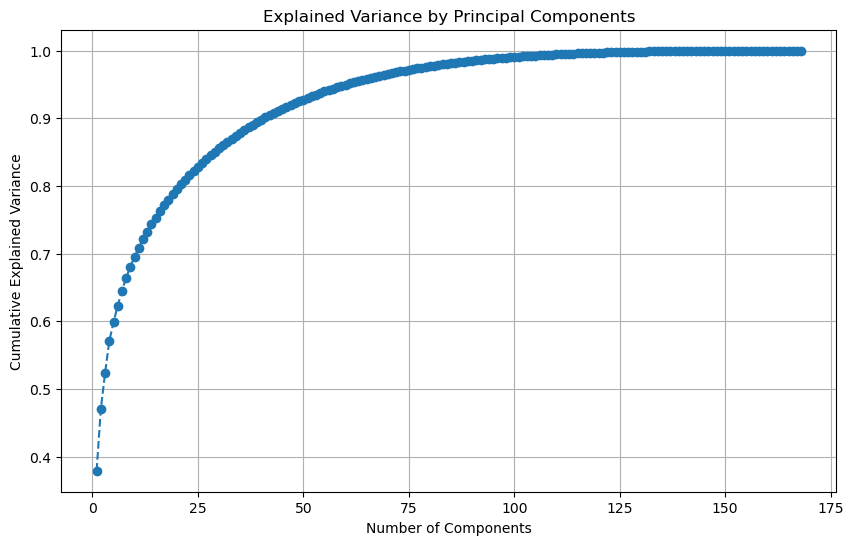

Explained variance ratio: [3.79104594e-01 9.15153586e-02 5.27957538e-02 4.73556455e-02
 2.76597908e-02 2.47531319e-02 2.19625556e-02 1.93952476e-02
 1.60533847e-02 1.49757586e-02 1.33253763e-02 1.22121969e-02
 1.14356802e-02 1.09522526e-02 9.81729090e-03 9.12697467e-03
 8.75133808e-03 8.39837835e-03 8.11549591e-03 7.66911496e-03
 7.18074262e-03 6.86547057e-03 6.44560661e-03 6.31478185e-03
 6.21211211e-03 5.91354047e-03 5.60179219e-03 5.41390157e-03
 5.20892473e-03 4.94768446e-03 4.81748971e-03 4.68213751e-03
 4.61604240e-03 4.52915728e-03 4.30591851e-03 4.25956977e-03
 4.15523373e-03 3.76368033e-03 3.74083381e-03 3.55508906e-03
 3.44153679e-03 3.39228411e-03 3.20160009e-03 3.10760291e-03
 3.00788832e-03 2.93606835e-03 2.86909424e-03 2.81440826e-03
 2.59524826e-03 2.55873691e-03 2.51379513e-03 2.41731089e-03
 2.39803399e-03 2.36737172e-03 2.27407066e-03 2.25044931e-03
 2.08385776e-03 2.06908949e-03 1.94807063e-03 1.90574733e-03
 1.85826466e-03 1.80247801e-03 1.69547367e-03 1.65565607e-0

In [11]:
# Run PCA on 2010s data
pca = PCA()
pca.fit(decade10)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# Print the explained variance ratio for each component
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

In [12]:
# Run PCA on 2010s data using 50 components
n_components = 50
pca = PCA(n_components = n_components)
principal_components = pca.fit_transform(decade10)

In [13]:
# Create a DataFrame with the principal components for 2010s data
columns = [f'PC{i+1}' for i in range(n_components)]
pca2010s = pd.DataFrame(principal_components, columns=columns)

In [14]:
pca2010s.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -11.653382 -3.873210  6.074452  0.123388 -0.968368  1.171960 -0.447588   
1 -13.568085  0.666726  3.077735 -1.104931  0.550993  1.553505 -0.525015   
2 -13.938045  4.319845  1.054509  1.805732  0.583261  3.883793 -0.249772   
3 -14.729376  2.912552  1.664133  2.213242 -1.166523  3.073382  0.055982   
4 -15.265355 -0.772211  4.171949  1.013889 -1.776917  3.175054 -0.729169   

        PC8       PC9      PC10  ...      PC41      PC42      PC43      PC44  \
0 -0.129327 -2.267348  3.301493  ... -0.300396 -0.609866 -0.824968 -0.590971   
1  1.117867 -1.007433  2.541061  ... -1.173385 -0.346157 -0.237715  0.180764   
2 -0.431767 -1.408370  4.338184  ...  0.304056  0.384554 -0.997492  0.496308   
3 -1.798642 -0.949101  4.220811  ... -0.514545 -0.655077  1.123558  0.886710   
4  1.201008 -2.583059  1.791698  ... -0.460076 -1.266632  0.107329  0.340648   

       PC45      PC46      PC47      PC48      PC49      PC50  
0  0.331645  1.136070  0.649129  0.200828 -0.144830  0.236411  
1  0.101254  0.190777  1.068396  0.635422 -0.669945 -1.232463  
2  2.169246 -0.275141  0.192675 -0.643292  1.048799  0.829062  
3 -0.473832 -1.750653  0.488296 -0.434139  1.465238  0.393132  
4  1.064726  1.124148  0.085985  0.093715  0.013656 -0.148116  

[5 rows x 50 columns]

In [15]:
pca2010s.to_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Machine Learning\Climate Data\Decade 10 PCA.csv', index = False)

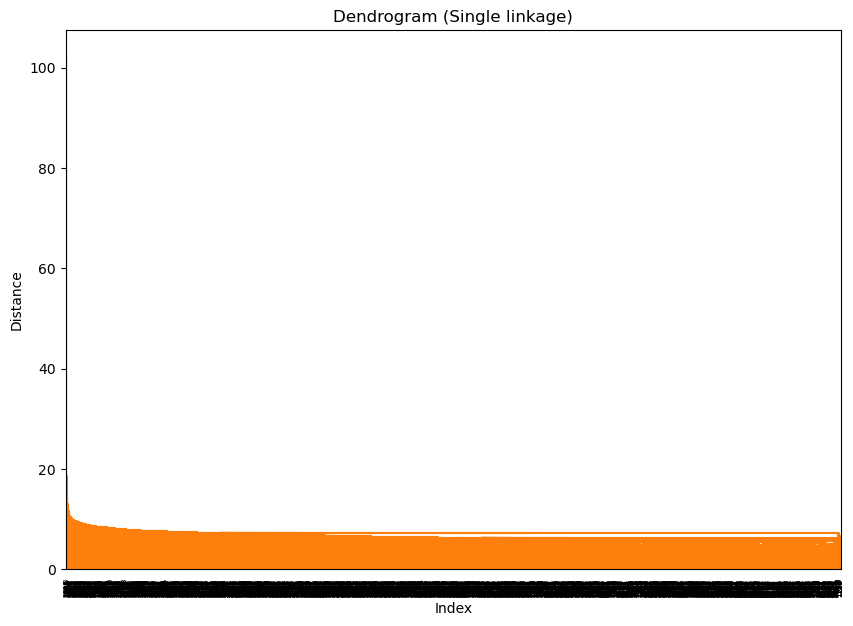

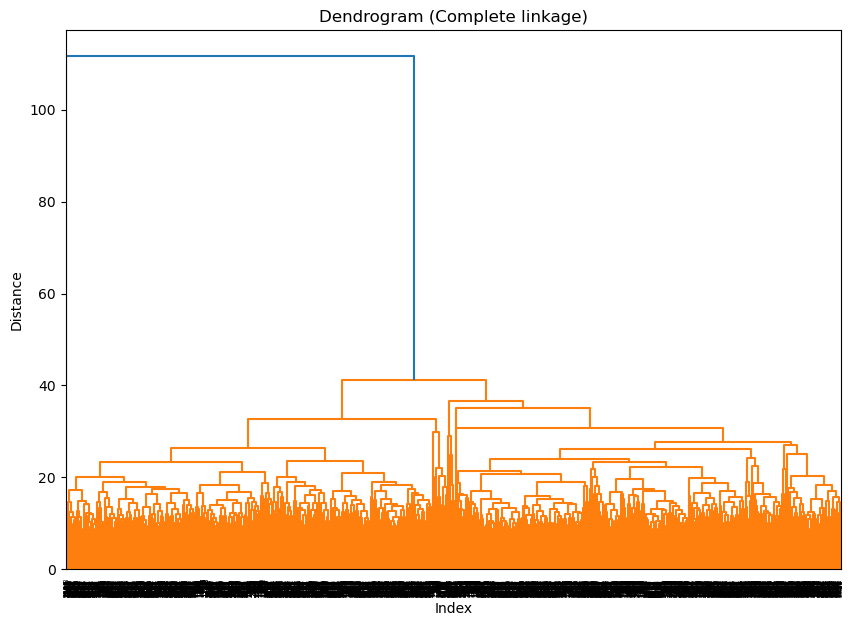

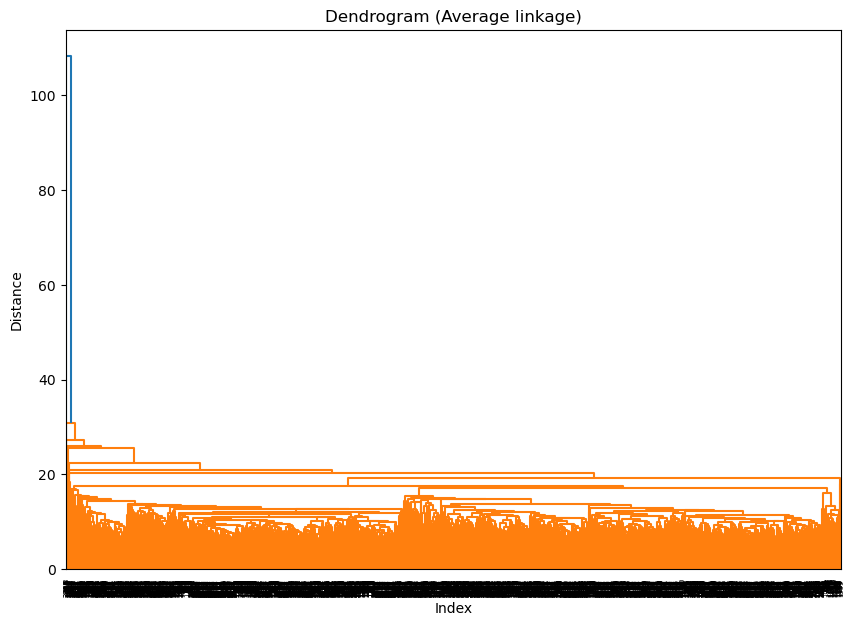

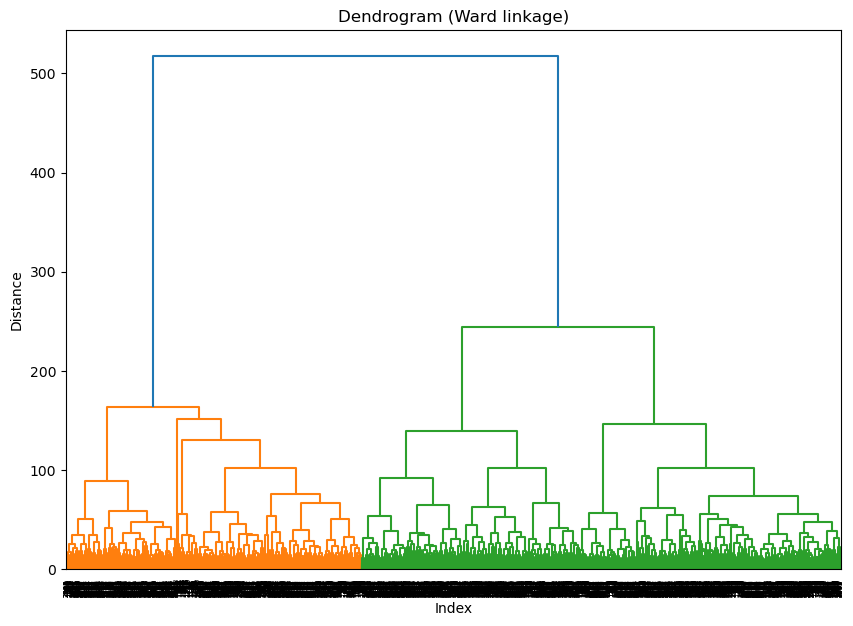

In [16]:
# Perform hierarchical clustering on 2010s PCA data
# Define the linkage methods
methods = ['single', 'complete', 'average', 'ward']

for method in methods:
    Y = linkage(pca2010s, method=method)
    
    plt.figure(figsize=(10, 7))
    plt.title(f'Dendrogram ({method.capitalize()} linkage)')
    dendrogram(Y)
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()

In [35]:
pleasant10 = climate[climate['Date'].astype(str).str.startswith('201')]
pleasant10.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
18263           1.076130          0.245067        1.548792       -3.288021   
18264          -1.001953          1.200556       -0.167609        0.196744   
18265          -1.001953         -0.573924       -0.077273        0.701118   
18266          -0.170720         -1.529413        0.645423       -0.170073   
18267           0.660514         -0.983419        0.193738       -1.637343   

       BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
18263               -1.251420             0.676766         -0.179228   
18264               -0.821838            -0.445514          0.319230   
18265               -0.789619            -0.445514         -0.179228   
18266               -0.929233            -0.445514         -0.179228   
18267               -0.875535            -0.365351         -0.179228   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
18263       -1.065304        -1.017527       -0.998933  ...   
18264        0.140992        -1.615075       -1.612055  ...   
18265        0.396170        -1.845947       -1.887961  ...   
18266       -0.206978        -2.076818       -2.240506  ...   
18267       -0.044592        -1.954592       -2.056569  ...   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
18263          -0.199725                  -0.829990               -0.490810   
18264           0.499440                  -0.806427               -0.490810   
18265           0.499440                  -0.912459               -0.005560   
18266           0.713851                  -0.771082                0.112794   
18267          -0.237013                  -0.806427               -0.384292   

       VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
18263            -0.024706           0.762612           -2.711082   
18264            -0.024706           0.762612           -2.981462   
18265            -0.024706          -0.558963           -3.071588   
18266            -0.024706           0.912791           -2.110239   
18267            -0.024706           0.372147           -2.530829   

       VALENTIA_temp_min  VALENTIA_temp_max      Date  Month  
18263          -2.596636          -2.448957  20100101      1  
18264          -3.389134          -2.103861  20100102      1  
18265          -3.279824          -2.420199  20100103      1  
18266          -1.804137          -2.794053  20100104      1  
18267          -2.350688          -2.333925  20100105      1  

[5 rows x 170 columns]

In [ ]:
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import cdist


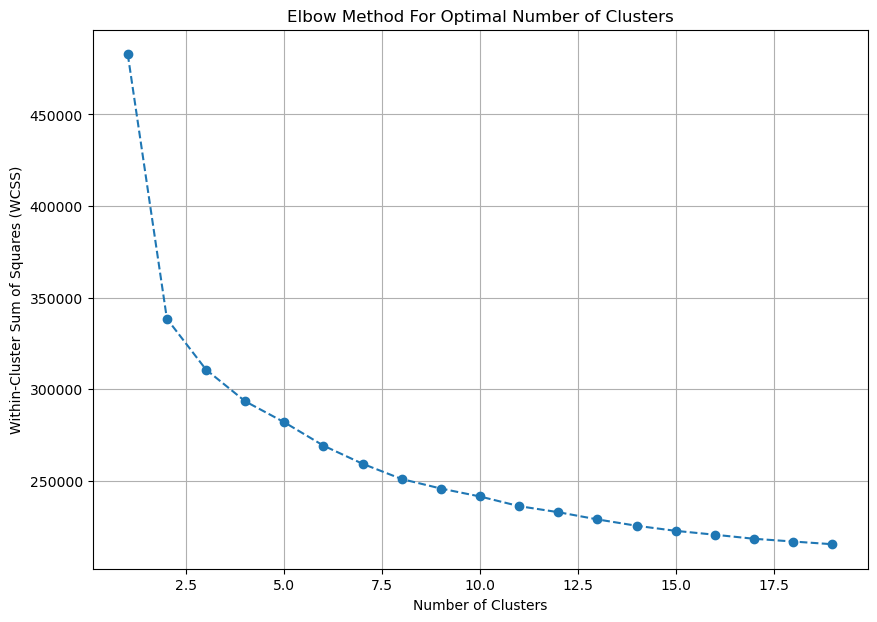

In [18]:
# Perform hierarchical clustering
B = linkage(pca2010s, method='ward')

# Define a range for the number of clusters
num_clusters_range = range(1, 20)

# Calculate the within-cluster sum of squares (WCSS) for each number of clusters
wcss = []
for num_clusters in num_clusters_range:
    cluster_labels = fcluster(B, num_clusters, criterion='maxclust')
    centroids = np.array([pca2010s[cluster_labels == i].mean(axis=0) for i in range(1, num_clusters + 1)])
    distances = np.min(cdist(pca2010s, centroids, 'euclidean'), axis=1)
    wcss.append(sum(distances**2))

# Plot the Elbow Curve
plt.figure(figsize=(10, 7))
plt.plot(num_clusters_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

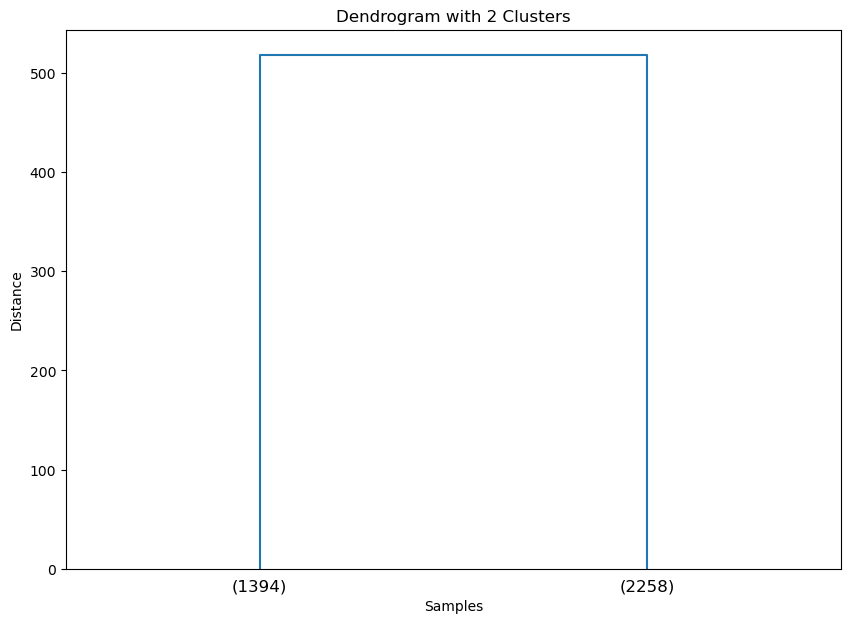

In [21]:
#Cut the dendrogram to 2 clusters
n_clusters = 2
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = cluster_model.fit_predict(pca2010s)

# Step 2: Assign cluster labels to the original DataFrame
pca2010s['Cluster'] = cluster_labels

plt.figure(figsize=(10, 7))
plt.title('Dendrogram with 2 Clusters')
dendrogram(B, truncate_mode='lastp', p=n_clusters, show_leaf_counts=True)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [23]:
merged_2010 = pd.merge(pca2010s, pleasant, left_index=True, right_index=True)
merged_2010.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -11.653382 -3.873210  6.074452  0.123388 -0.968368  1.171960 -0.447588   
1 -13.568085  0.666726  3.077735 -1.104931  0.550993  1.553505 -0.525015   
2 -13.938045  4.319845  1.054509  1.805732  0.583261  3.883793 -0.249772   
3 -14.729376  2.912552  1.664133  2.213242 -1.166523  3.073382  0.055982   
4 -15.265355 -0.772211  4.171949  1.013889 -1.776917  3.175054 -0.729169   

        PC8       PC9      PC10  ...  HEATHROW_pleasant_weather  \
0 -0.129327 -2.267348  3.301493  ...                          0   
1  1.117867 -1.007433  2.541061  ...                          0   
2 -0.431767 -1.408370  4.338184  ...                          0   
3 -1.798642 -0.949101  4.220811  ...                          0   
4  1.201008 -2.583059  1.791698  ...                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 66 columns]

In [24]:
merged_2010.columns.tolist()

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'Cluster',
 'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

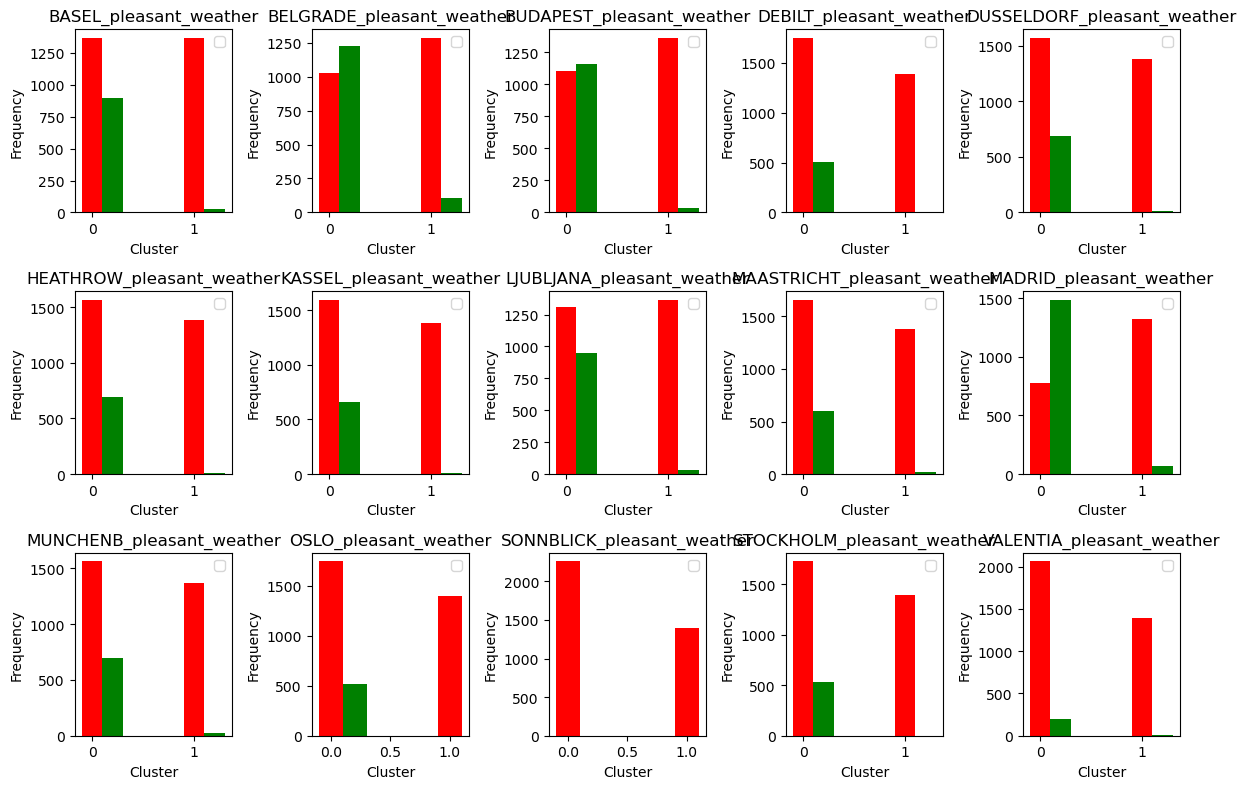

In [25]:
# create bar plots to show pleasantness in each cluster for each city
# List of pleasant_weather columns
pleasant_weather_columns = [
    'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather'] 

fig, axes = plt.subplots(3, 5, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the colors based on pleasantness
colors = {0: 'red', 1: 'green'}

# Loop over each pleasant_weather column and create histograms
for i, column in enumerate(pleasant_weather_columns):
    ax = axes[i]
    cluster_data = merged_2010[['Cluster', column]]
    for pleasantness in cluster_data[column].unique():
        sub_data = cluster_data[cluster_data[column] == pleasantness]
        counts = sub_data['Cluster'].value_counts().sort_index()
        ax.bar(counts.index + 0.2 * pleasantness, counts, width=0.2, color=colors[pleasantness])

    ax.set_title(f'{column}')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Frequency')
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

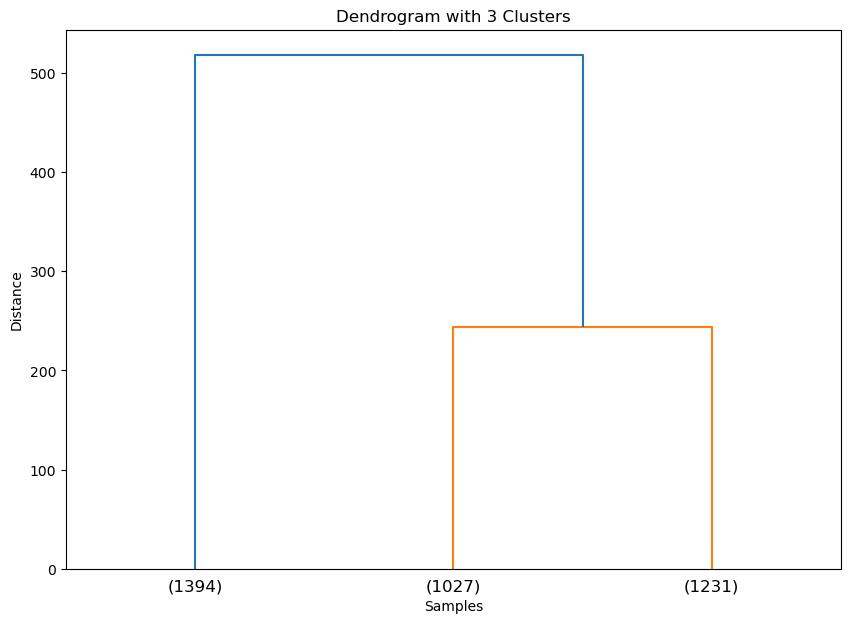

In [27]:
#Cut the dendrogram to 3 clusters
n_clusters = 3
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = cluster_model.fit_predict(pca2010s)

# Step 2: Assign cluster labels to the original DataFrame
pca2010s['Cluster'] = cluster_labels

plt.figure(figsize=(10, 7))
plt.title('Dendrogram with 3 Clusters')
dendrogram(B, truncate_mode='lastp', p=n_clusters, show_leaf_counts=True)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [28]:
merged_2010_3 = pd.merge(pca2010s, pleasant, left_index=True, right_index=True)
merged_2010_3.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -11.653382 -3.873210  6.074452  0.123388 -0.968368  1.171960 -0.447588   
1 -13.568085  0.666726  3.077735 -1.104931  0.550993  1.553505 -0.525015   
2 -13.938045  4.319845  1.054509  1.805732  0.583261  3.883793 -0.249772   
3 -14.729376  2.912552  1.664133  2.213242 -1.166523  3.073382  0.055982   
4 -15.265355 -0.772211  4.171949  1.013889 -1.776917  3.175054 -0.729169   

        PC8       PC9      PC10  ...  HEATHROW_pleasant_weather  \
0 -0.129327 -2.267348  3.301493  ...                          0   
1  1.117867 -1.007433  2.541061  ...                          0   
2 -0.431767 -1.408370  4.338184  ...                          0   
3 -1.798642 -0.949101  4.220811  ...                          0   
4  1.201008 -2.583059  1.791698  ...                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 66 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

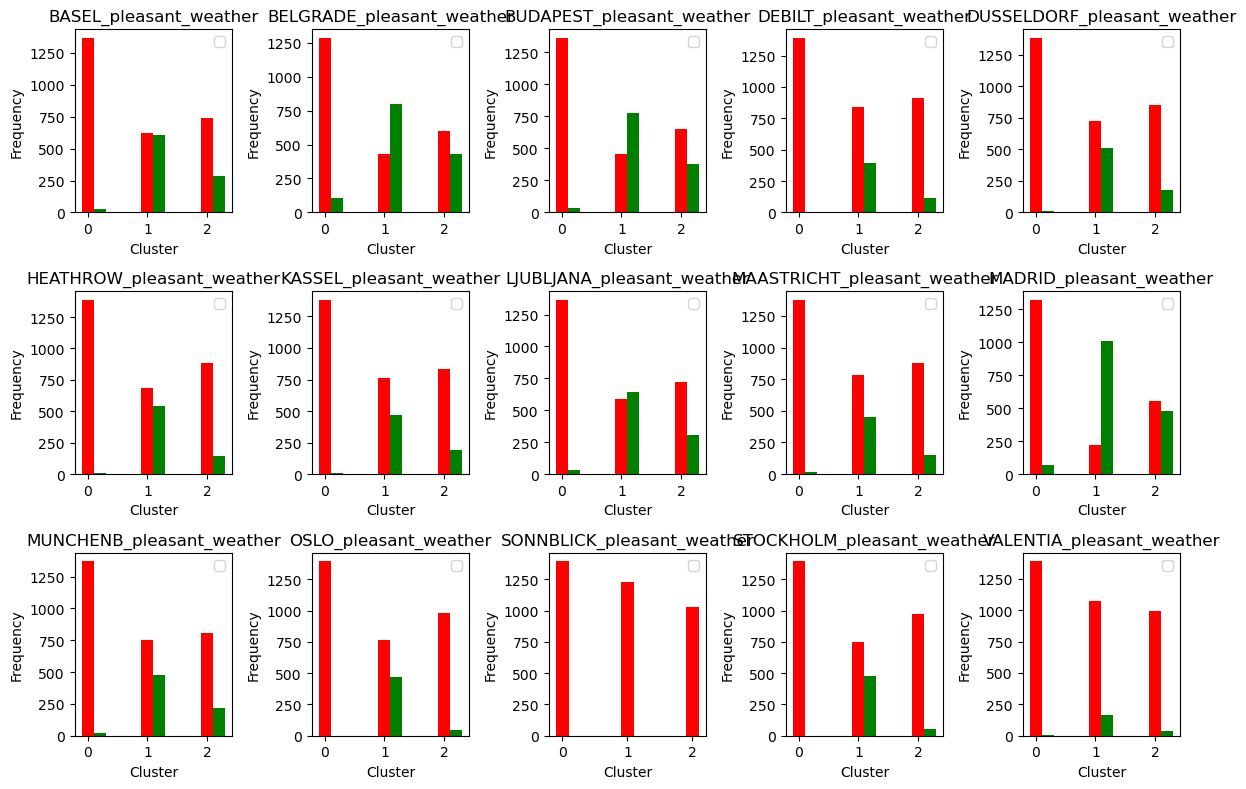

In [29]:
# create bar plots to show pleasantness in each cluster for each city
# List of pleasant_weather columns
pleasant_weather_columns = [
    'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather'] 

fig, axes = plt.subplots(3, 5, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the colors based on pleasantness
colors = {0: 'red', 1: 'green'}

# Loop over each pleasant_weather column and create histograms
for i, column in enumerate(pleasant_weather_columns):
    ax = axes[i]
    cluster_data = merged_2010_3[['Cluster', column]]
    for pleasantness in cluster_data[column].unique():
        sub_data = cluster_data[cluster_data[column] == pleasantness]
        counts = sub_data['Cluster'].value_counts().sort_index()
        ax.bar(counts.index + 0.2 * pleasantness, counts, width=0.2, color=colors[pleasantness])

    ax.set_title(f'{column}')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Frequency')
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Repeat Analysis on Only Heathrow Data from 2010s

In [30]:
# select only Heathrow values for 2010's 
Heathrow10 = decade10[[col for col in decade10.columns if 'HEATHROW' in col]]
Heathrow10.head()

HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
18263             -1.623672          -0.012023          -0.936526   
18264             -0.640848           0.468190           0.010574   
18265             -1.623672           0.468190           0.708941   
18266             -2.606496           0.852360           0.402807   
18267              0.833387           0.660275          -0.974792   

       HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_snow_depth  \
18263                  -0.781415               -0.436400            -0.073841   
18264                  -0.792692               -0.436400            -0.073841   
18265                  -0.894180               -0.436400            -0.073841   
18266                  -0.770139               -0.383906            -0.073841   
18267                  -1.164817                0.088538            -0.073841   

       HEATHROW_sunshine  HEATHROW_temp_mean  HEATHROW_temp_min  \
18263           0.538458           -1.678883          -1.466534   
18264           0.413209           -1.731297          -1.823505   
18265          -0.087784           -1.748768          -1.485322   
18266           0.513408           -2.395205          -2.462294   
18267          -1.039671           -2.290378          -2.481082   

       HEATHROW_temp_max  
18263          -1.541696  
18264          -1.846669  
18265          -2.166890  
18266          -1.983906  
18267          -2.151641

In [36]:
pleasant.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [37]:
# select pleasantness values from 2010's and drop the date column
pleasant10 = pleasant[pleasant['DATE'].astype(str).str.startswith('201')]
pleasant10.drop(['DATE'], axis = 1, inplace = True)
pleasant10.head()

C:\Users\kacie\AppData\Local\Temp\ipykernel_22236\1074015026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pleasant10.drop(['DATE'], axis = 1, inplace = True)


BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263                       0                          0   
18264                       0                          0   
18265                       0                          0   
18266                       0                          0   
18267                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0                      0   
18265                          0                      0   
18266                          0                      0   
18267                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18263                           0                           0   
18264                           0                           0   
18265                           0                           0   
18266                           0                           0   
18267                           0                           0   

       VALENTIA_pleasant_weather  
18263                          0  
18264                          0  
18265                          0  
18266                          0  
18267                          0

In [58]:
# select only Heathrow pleasantness values for 2010's 
HeathPleas10 = pleasant10[['HEATHROW_pleasant_weather']]
HeathPleas10.head()

HEATHROW_pleasant_weather
18263                          0
18264                          0
18265                          0
18266                          0
18267                          0

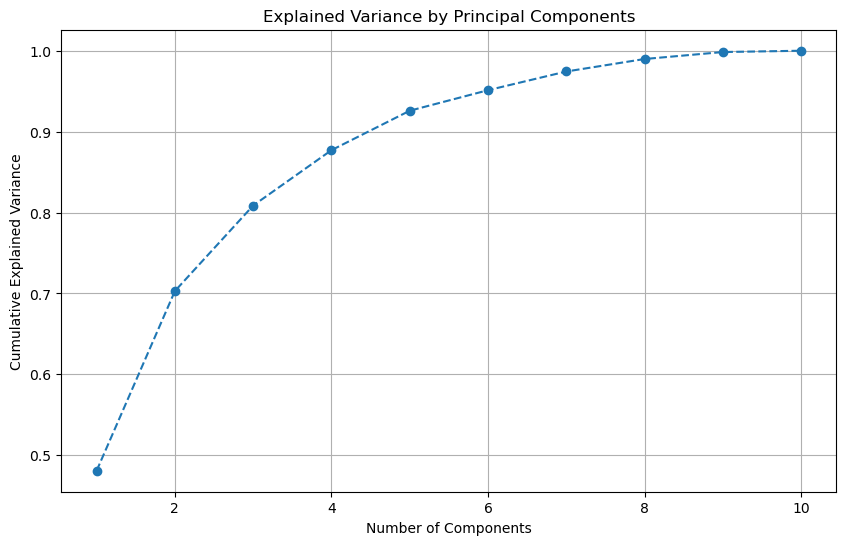

Explained variance ratio: [0.48091157 0.22209276 0.10566894 0.06843852 0.04873918 0.02536537
 0.02311366 0.01544388 0.00859343 0.0016327 ]


In [39]:
# Run PCA on Heathrow 2010s data
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(Heathrow10)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# Print the explained variance ratio for each component
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

In [40]:
# Run PCA on Heathrow 2010s data using 5 components
n_components = 5
pca = PCA(n_components = n_components)
principal_components = pca.fit_transform(Heathrow10)

In [41]:
# Create a DataFrame with the principal components for Heathrow 2010s data
columns = [f'PC{i+1}' for i in range(n_components)]
pcaHeath10 = pd.DataFrame(principal_components, columns=columns)

In [42]:
pcaHeath10.head()

PC1       PC2       PC3       PC4       PC5
0 -1.447181 -2.726699  1.231066 -0.906343 -0.510326
1 -2.153218 -2.700722  0.341384 -0.284249 -0.071735
2 -1.975850 -3.157563  0.089936  0.273019 -0.629006
3 -1.994335 -4.337034  0.910451  0.262331 -1.187958
4 -4.173134 -1.832375  0.589975 -0.758858  0.849049

In [65]:
pcaHeath10.to_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Machine Learning\Climate Data\Decade 10 Heathrow PCA.csv', index = False)

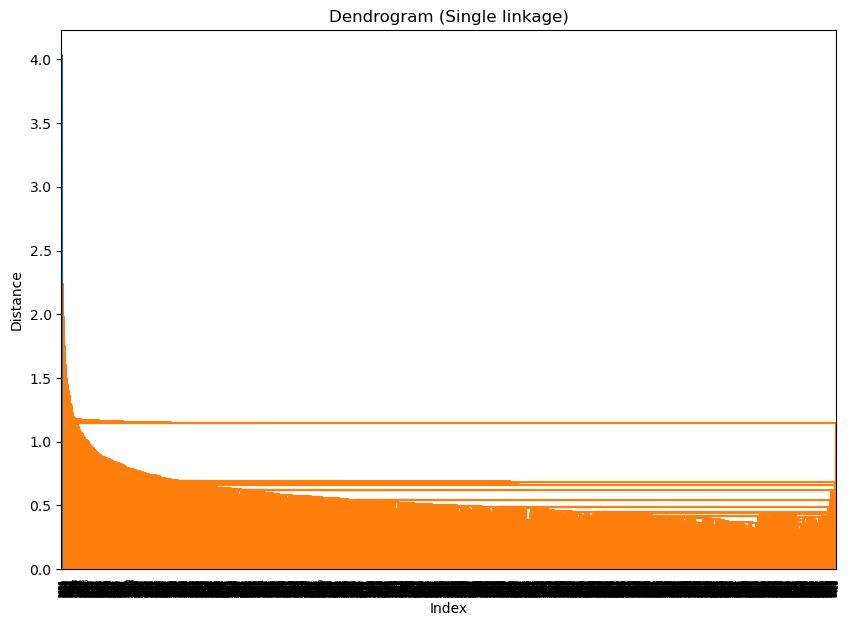

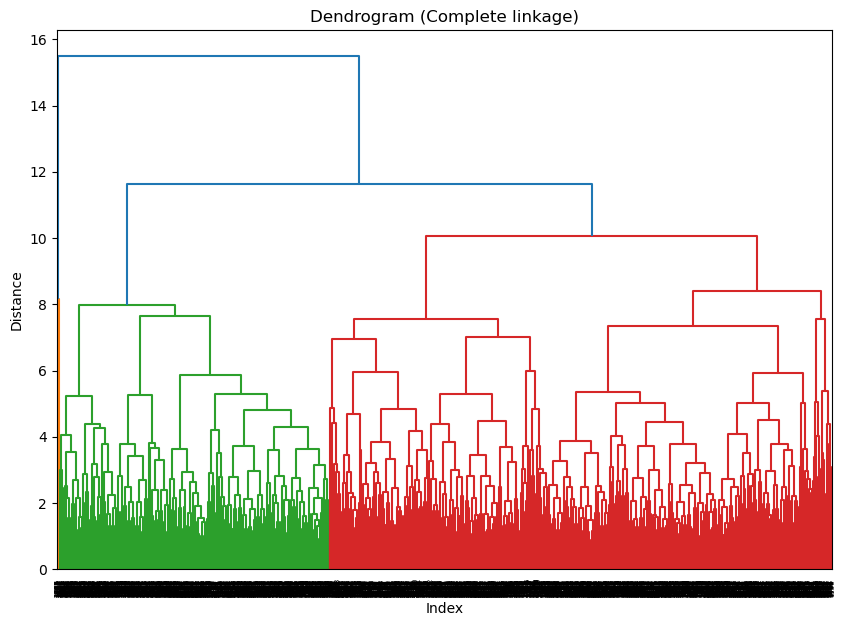

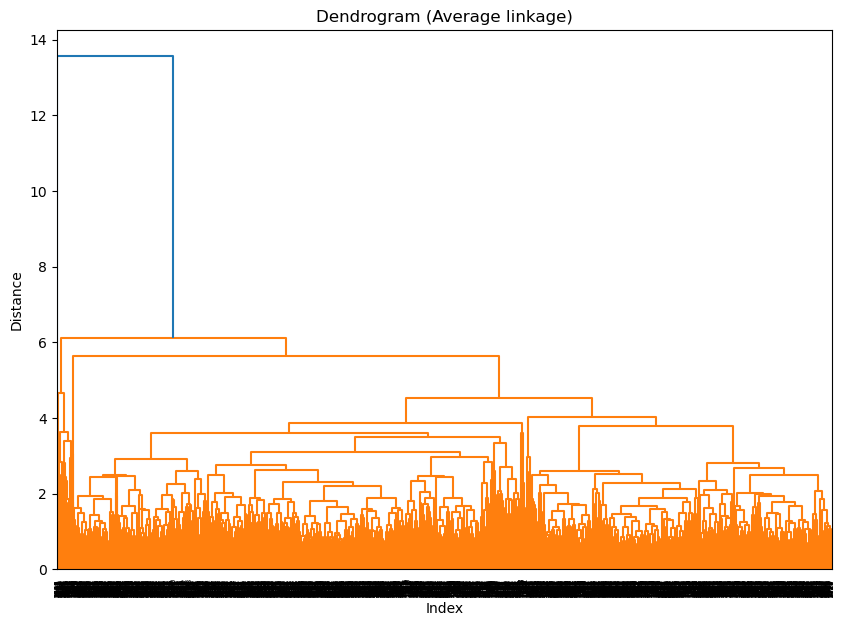

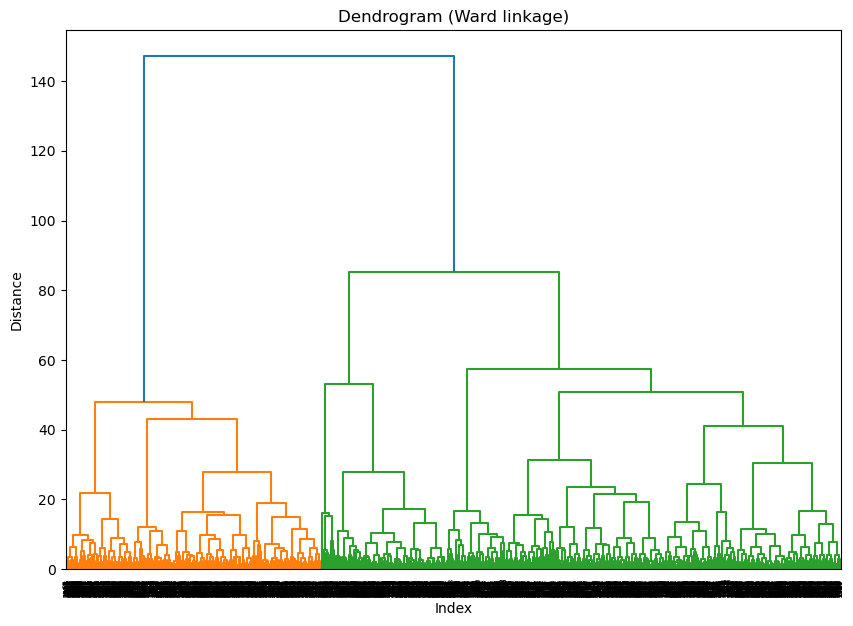

In [43]:
# Perform hierarchical clustering on Heathrow 2010s PCA data
# Define the linkage methods
methods = ['single', 'complete', 'average', 'ward']

for method in methods:
    Y = linkage(pcaHeath10, method=method)
    
    plt.figure(figsize=(10, 7))
    plt.title(f'Dendrogram ({method.capitalize()} linkage)')
    dendrogram(Y)
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()

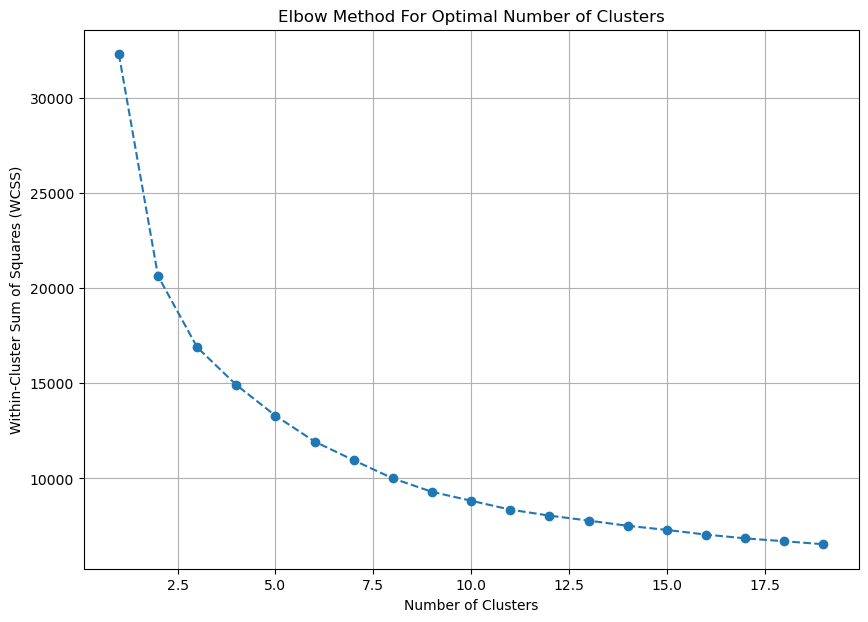

In [44]:
# Perform hierarchical clustering
W = linkage(pcaHeath10, method='ward')

# Define a range for the number of clusters
num_clusters_range = range(1, 20)

# Calculate the within-cluster sum of squares (WCSS) for each number of clusters
wcss = []
for num_clusters in num_clusters_range:
    cluster_labels = fcluster(W, num_clusters, criterion='maxclust')
    centroids = np.array([pcaHeath10[cluster_labels == i].mean(axis=0) for i in range(1, num_clusters + 1)])
    distances = np.min(cdist(pcaHeath10, centroids, 'euclidean'), axis=1)
    wcss.append(sum(distances**2))

# Plot the Elbow Curve
plt.figure(figsize=(10, 7))
plt.plot(num_clusters_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

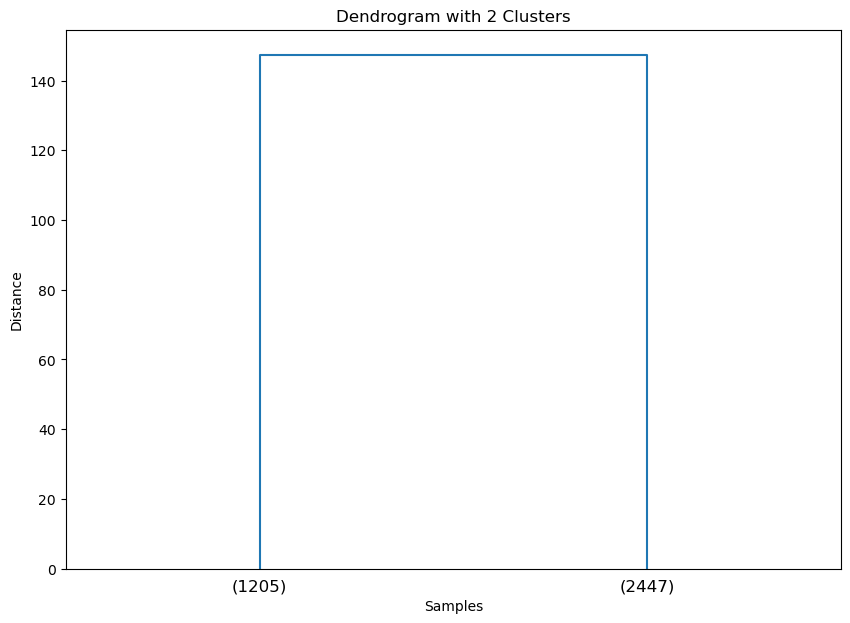

In [46]:
#Cut the dendrogram to 2 clusters
n_clusters = 2
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = cluster_model.fit_predict(pcaHeath10)

# Step 2: Assign cluster labels to the original DataFrame
pcaHeath10['Cluster'] = cluster_labels

plt.figure(figsize=(10, 7))
plt.title('Dendrogram with 2 Clusters')
dendrogram(W, truncate_mode='lastp', p=n_clusters, show_leaf_counts=True)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [59]:
HeathPleas10 = HeathPleas10.reset_index(drop=True)
HeathPleas10.head()

HEATHROW_pleasant_weather
0                          0
1                          0
2                          0
3                          0
4                          0

In [51]:
pcaHeath10.head()

PC1       PC2       PC3       PC4       PC5  Cluster
0 -1.447181 -2.726699  1.231066 -0.906343 -0.510326        0
1 -2.153218 -2.700722  0.341384 -0.284249 -0.071735        0
2 -1.975850 -3.157563  0.089936  0.273019 -0.629006        0
3 -1.994335 -4.337034  0.910451  0.262331 -1.187958        0
4 -4.173134 -1.832375  0.589975 -0.758858  0.849049        0

In [60]:
merged_heath = pd.merge(pcaHeath10, HeathPleas10, left_index=True, right_index=True)
merged_heath.head()

PC1       PC2       PC3       PC4       PC5  Cluster  \
0 -1.447181 -2.726699  1.231066 -0.906343 -0.510326        0   
1 -2.153218 -2.700722  0.341384 -0.284249 -0.071735        0   
2 -1.975850 -3.157563  0.089936  0.273019 -0.629006        0   
3 -1.994335 -4.337034  0.910451  0.262331 -1.187958        0   
4 -4.173134 -1.832375  0.589975 -0.758858  0.849049        0   

   HEATHROW_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [61]:
Heathcross = pd.crosstab(merged_heath['Cluster'], merged_heath['HEATHROW_pleasant_weather'])
print(Heathcross)

HEATHROW_pleasant_weather     0    1
Cluster                             
0                          2293  154
1                           498  707


C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


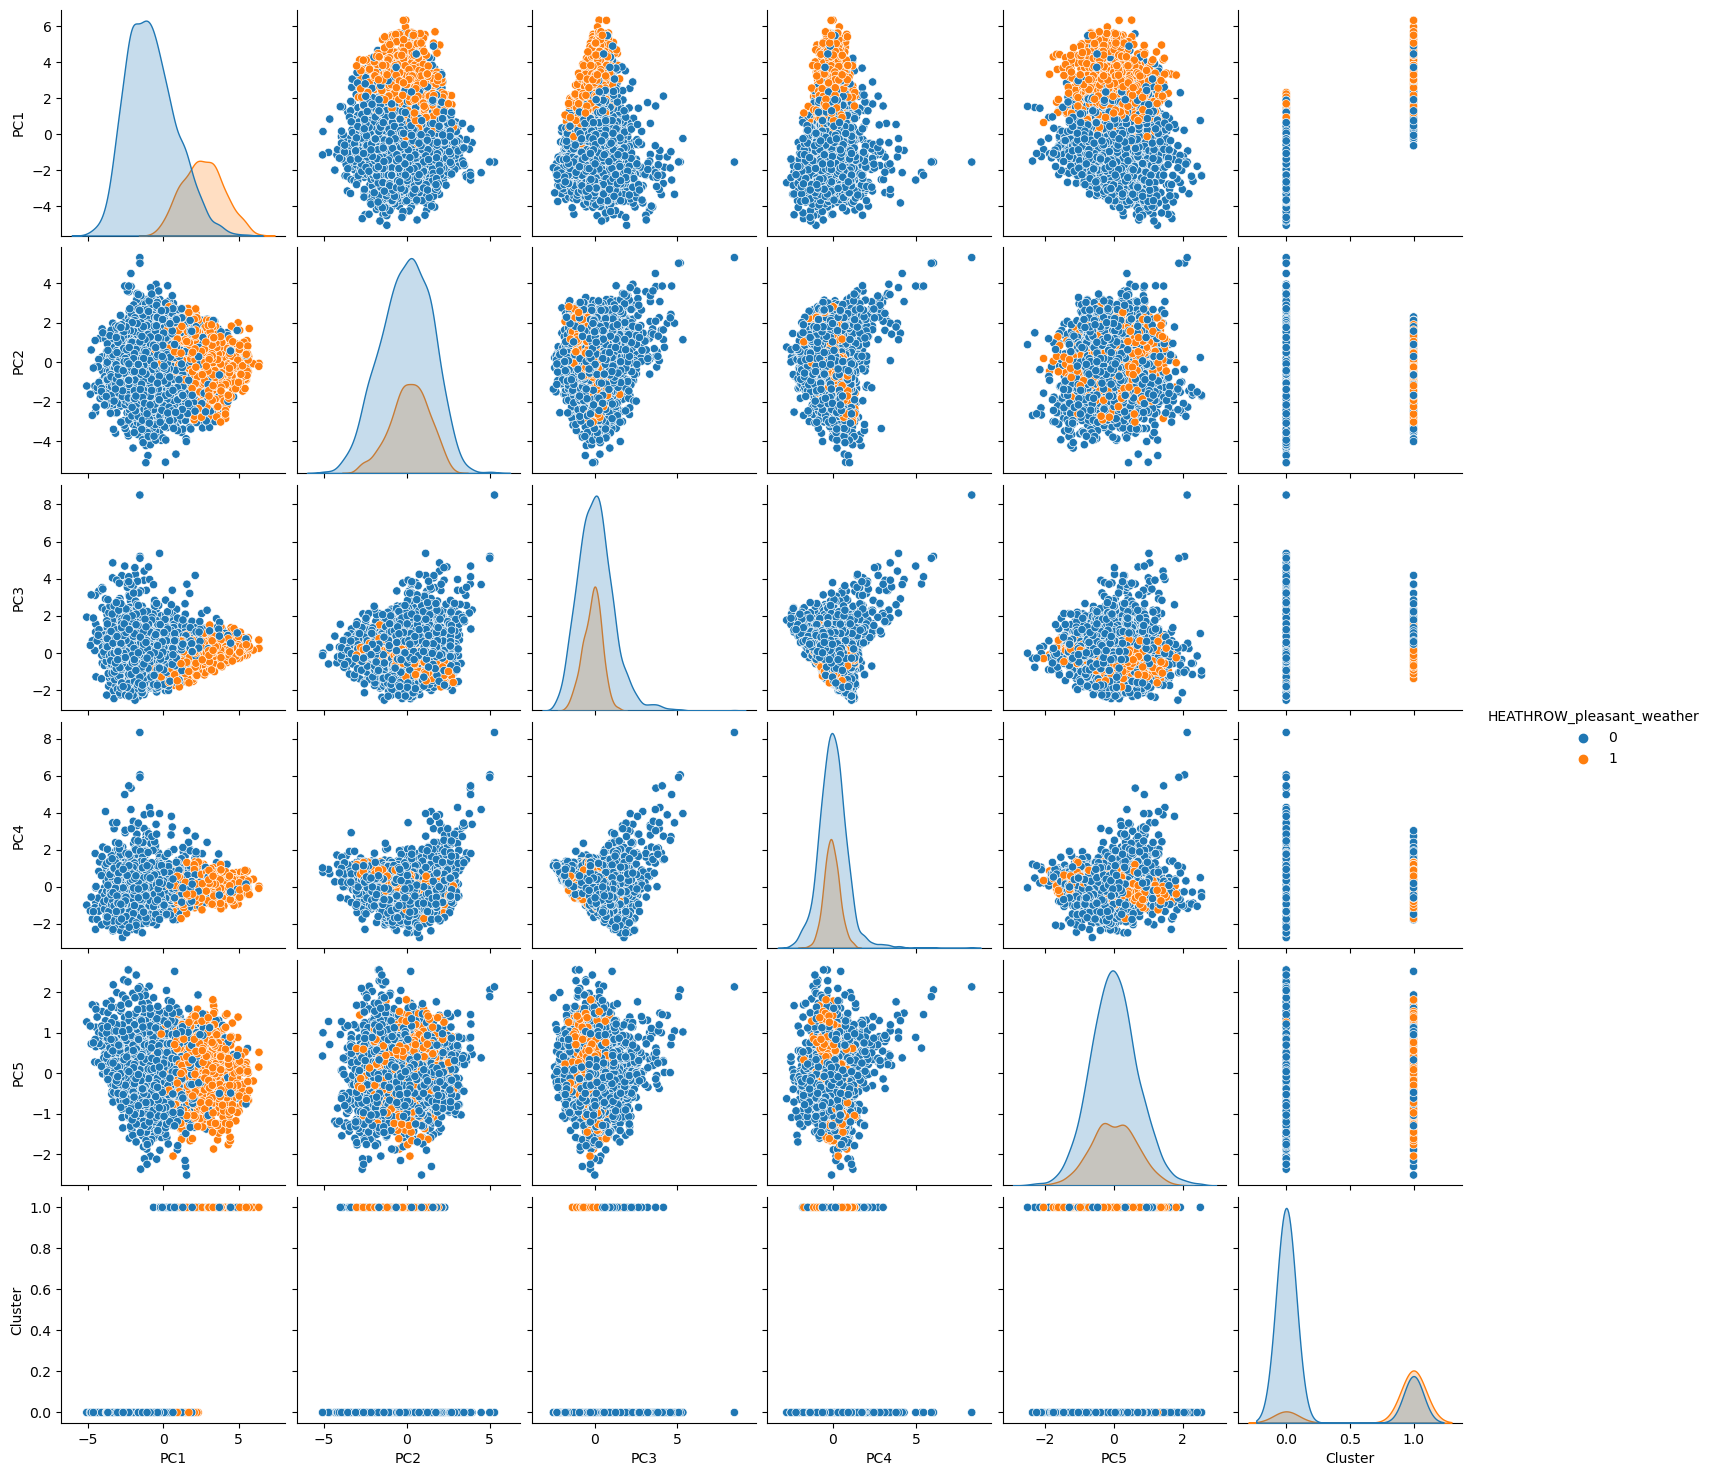

In [62]:
import seaborn as sns
sns.pairplot(merged_heath[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Cluster', 'HEATHROW_pleasant_weather']], hue = 'HEATHROW_pleasant_weather')

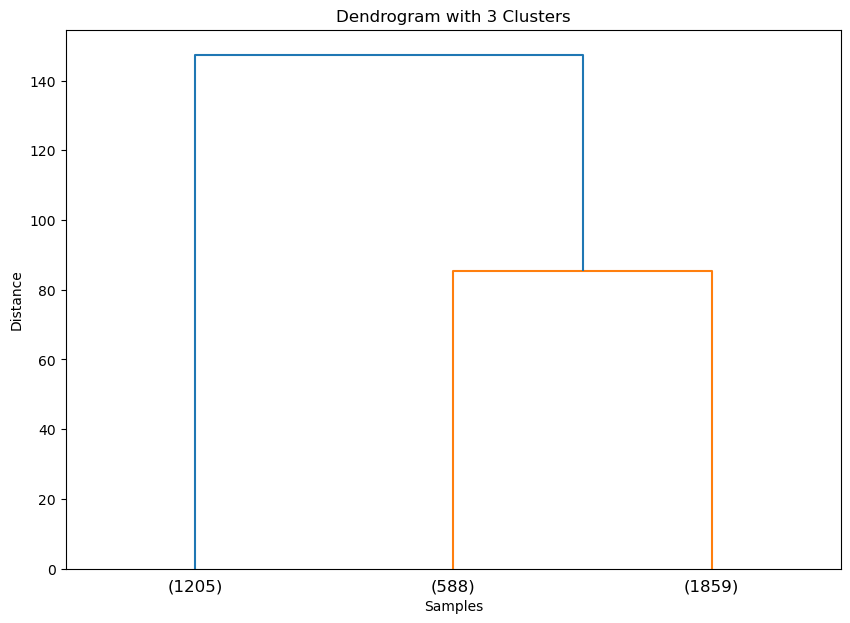

In [64]:
#Cut the dendrogram to 3 clusters
n_clusters = 3
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = cluster_model.fit_predict(pcaHeath10)

# Step 2: Assign cluster labels to the original DataFrame
Heath3C = pcaHeath10
Heath3C['Cluster'] = cluster_labels

plt.figure(figsize=(10, 7))
plt.title('Dendrogram with 3 Clusters')
dendrogram(W, truncate_mode='lastp', p=n_clusters, show_leaf_counts=True)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [65]:
Heath3C.head()

PC1       PC2       PC3       PC4       PC5  Cluster
0 -1.447181 -2.726699  1.231066 -0.906343 -0.510326        0
1 -2.153218 -2.700722  0.341384 -0.284249 -0.071735        0
2 -1.975850 -3.157563  0.089936  0.273019 -0.629006        0
3 -1.994335 -4.337034  0.910451  0.262331 -1.187958        0
4 -4.173134 -1.832375  0.589975 -0.758858  0.849049        0

In [66]:
merged_heath3 = pd.merge(Heath3C, HeathPleas10, left_index=True, right_index=True)
merged_heath3.head()

PC1       PC2       PC3       PC4       PC5  Cluster  \
0 -1.447181 -2.726699  1.231066 -0.906343 -0.510326        0   
1 -2.153218 -2.700722  0.341384 -0.284249 -0.071735        0   
2 -1.975850 -3.157563  0.089936  0.273019 -0.629006        0   
3 -1.994335 -4.337034  0.910451  0.262331 -1.187958        0   
4 -4.173134 -1.832375  0.589975 -0.758858  0.849049        0   

   HEATHROW_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [67]:
Heathcross3 = pd.crosstab(merged_heath3['Cluster'], merged_heath3['HEATHROW_pleasant_weather'])
print(Heathcross3)

HEATHROW_pleasant_weather     0    1
Cluster                             
0                          1828   31
1                           465  123
2                           498  707


C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


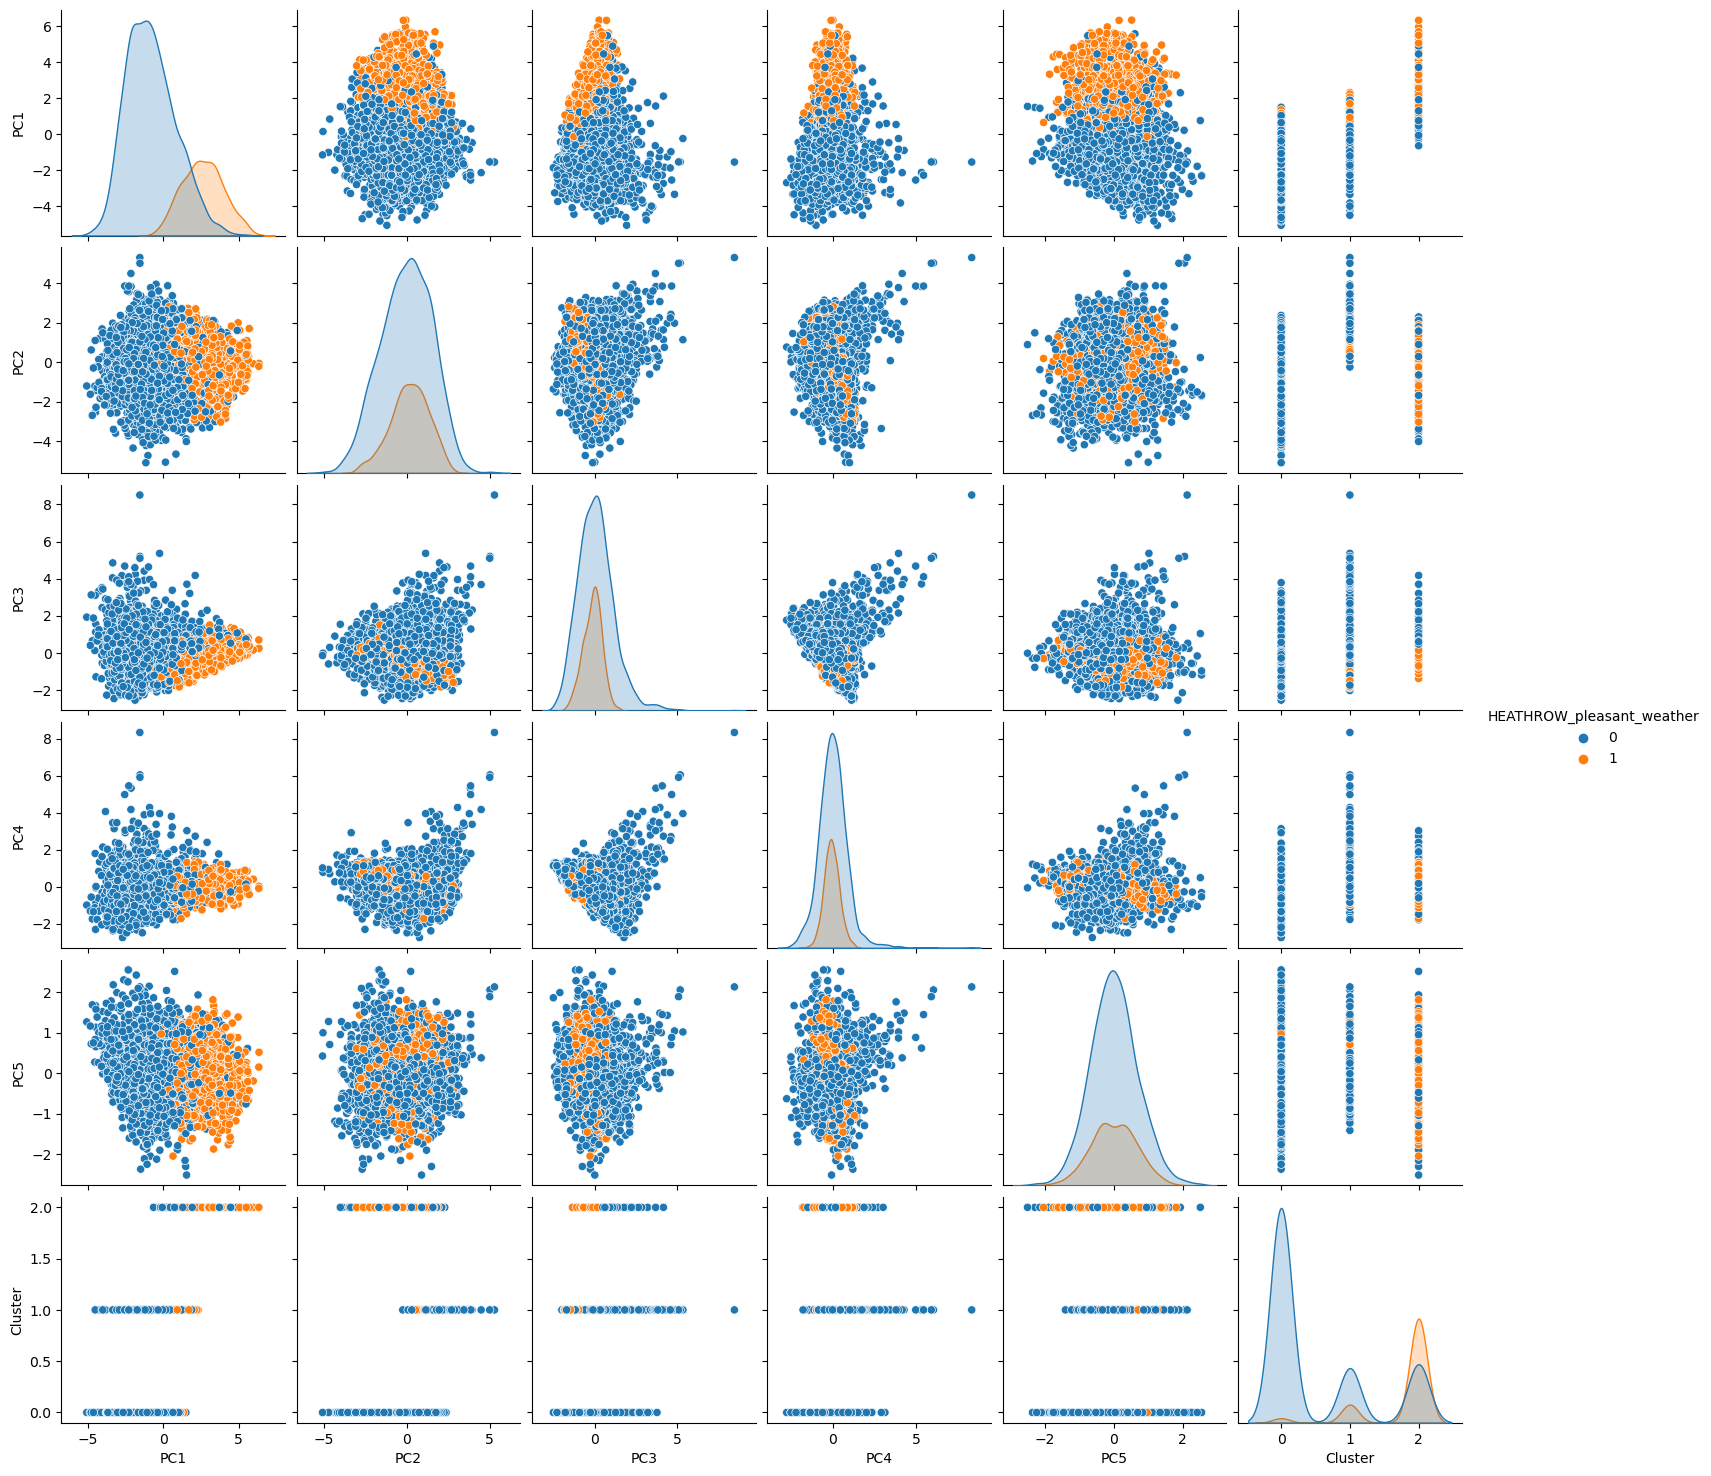

In [68]:
sns.pairplot(merged_heath3[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Cluster', 'HEATHROW_pleasant_weather']], hue = 'HEATHROW_pleasant_weather')

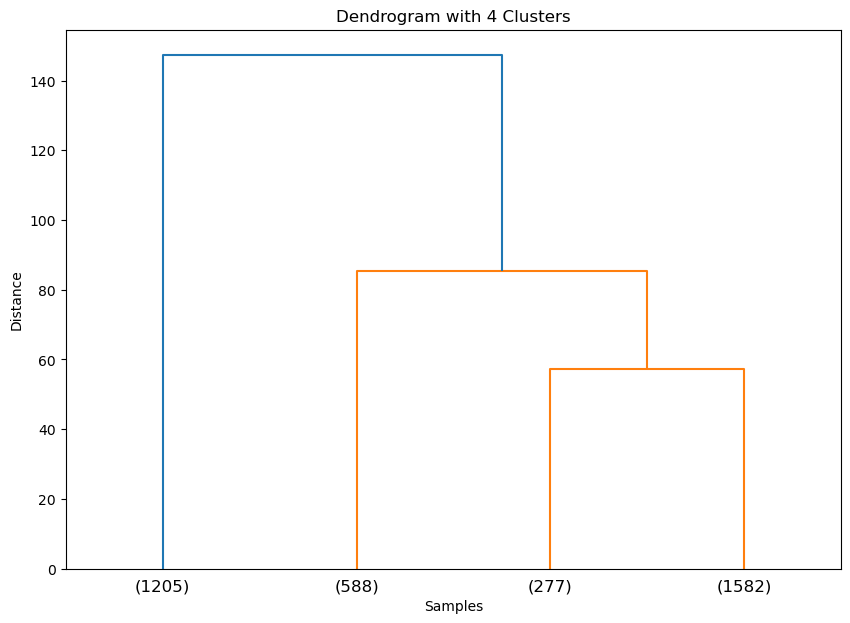

In [70]:
#Cut the dendrogram to 4 clusters
n_clusters = 4
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = cluster_model.fit_predict(pcaHeath10)

# Step 2: Assign cluster labels to the original DataFrame
Heath4C = pcaHeath10
Heath4C['Cluster'] = cluster_labels

plt.figure(figsize=(10, 7))
plt.title('Dendrogram with 4 Clusters')
dendrogram(W, truncate_mode='lastp', p=n_clusters, show_leaf_counts=True)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [71]:
Heath4C.head()

PC1       PC2       PC3       PC4       PC5  Cluster
0 -1.447181 -2.726699  1.231066 -0.906343 -0.510326        3
1 -2.153218 -2.700722  0.341384 -0.284249 -0.071735        3
2 -1.975850 -3.157563  0.089936  0.273019 -0.629006        3
3 -1.994335 -4.337034  0.910451  0.262331 -1.187958        3
4 -4.173134 -1.832375  0.589975 -0.758858  0.849049        1

In [72]:
merged_heath4 = pd.merge(Heath4C, HeathPleas10, left_index=True, right_index=True)
merged_heath4.head()

PC1       PC2       PC3       PC4       PC5  Cluster  \
0 -1.447181 -2.726699  1.231066 -0.906343 -0.510326        3   
1 -2.153218 -2.700722  0.341384 -0.284249 -0.071735        3   
2 -1.975850 -3.157563  0.089936  0.273019 -0.629006        3   
3 -1.994335 -4.337034  0.910451  0.262331 -1.187958        3   
4 -4.173134 -1.832375  0.589975 -0.758858  0.849049        1   

   HEATHROW_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [73]:
Heathcross4 = pd.crosstab(merged_heath4['Cluster'], merged_heath4['HEATHROW_pleasant_weather'])
print(Heathcross4)

HEATHROW_pleasant_weather     0    1
Cluster                             
0                           465  123
1                          1552   30
2                           498  707
3                           276    1


C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


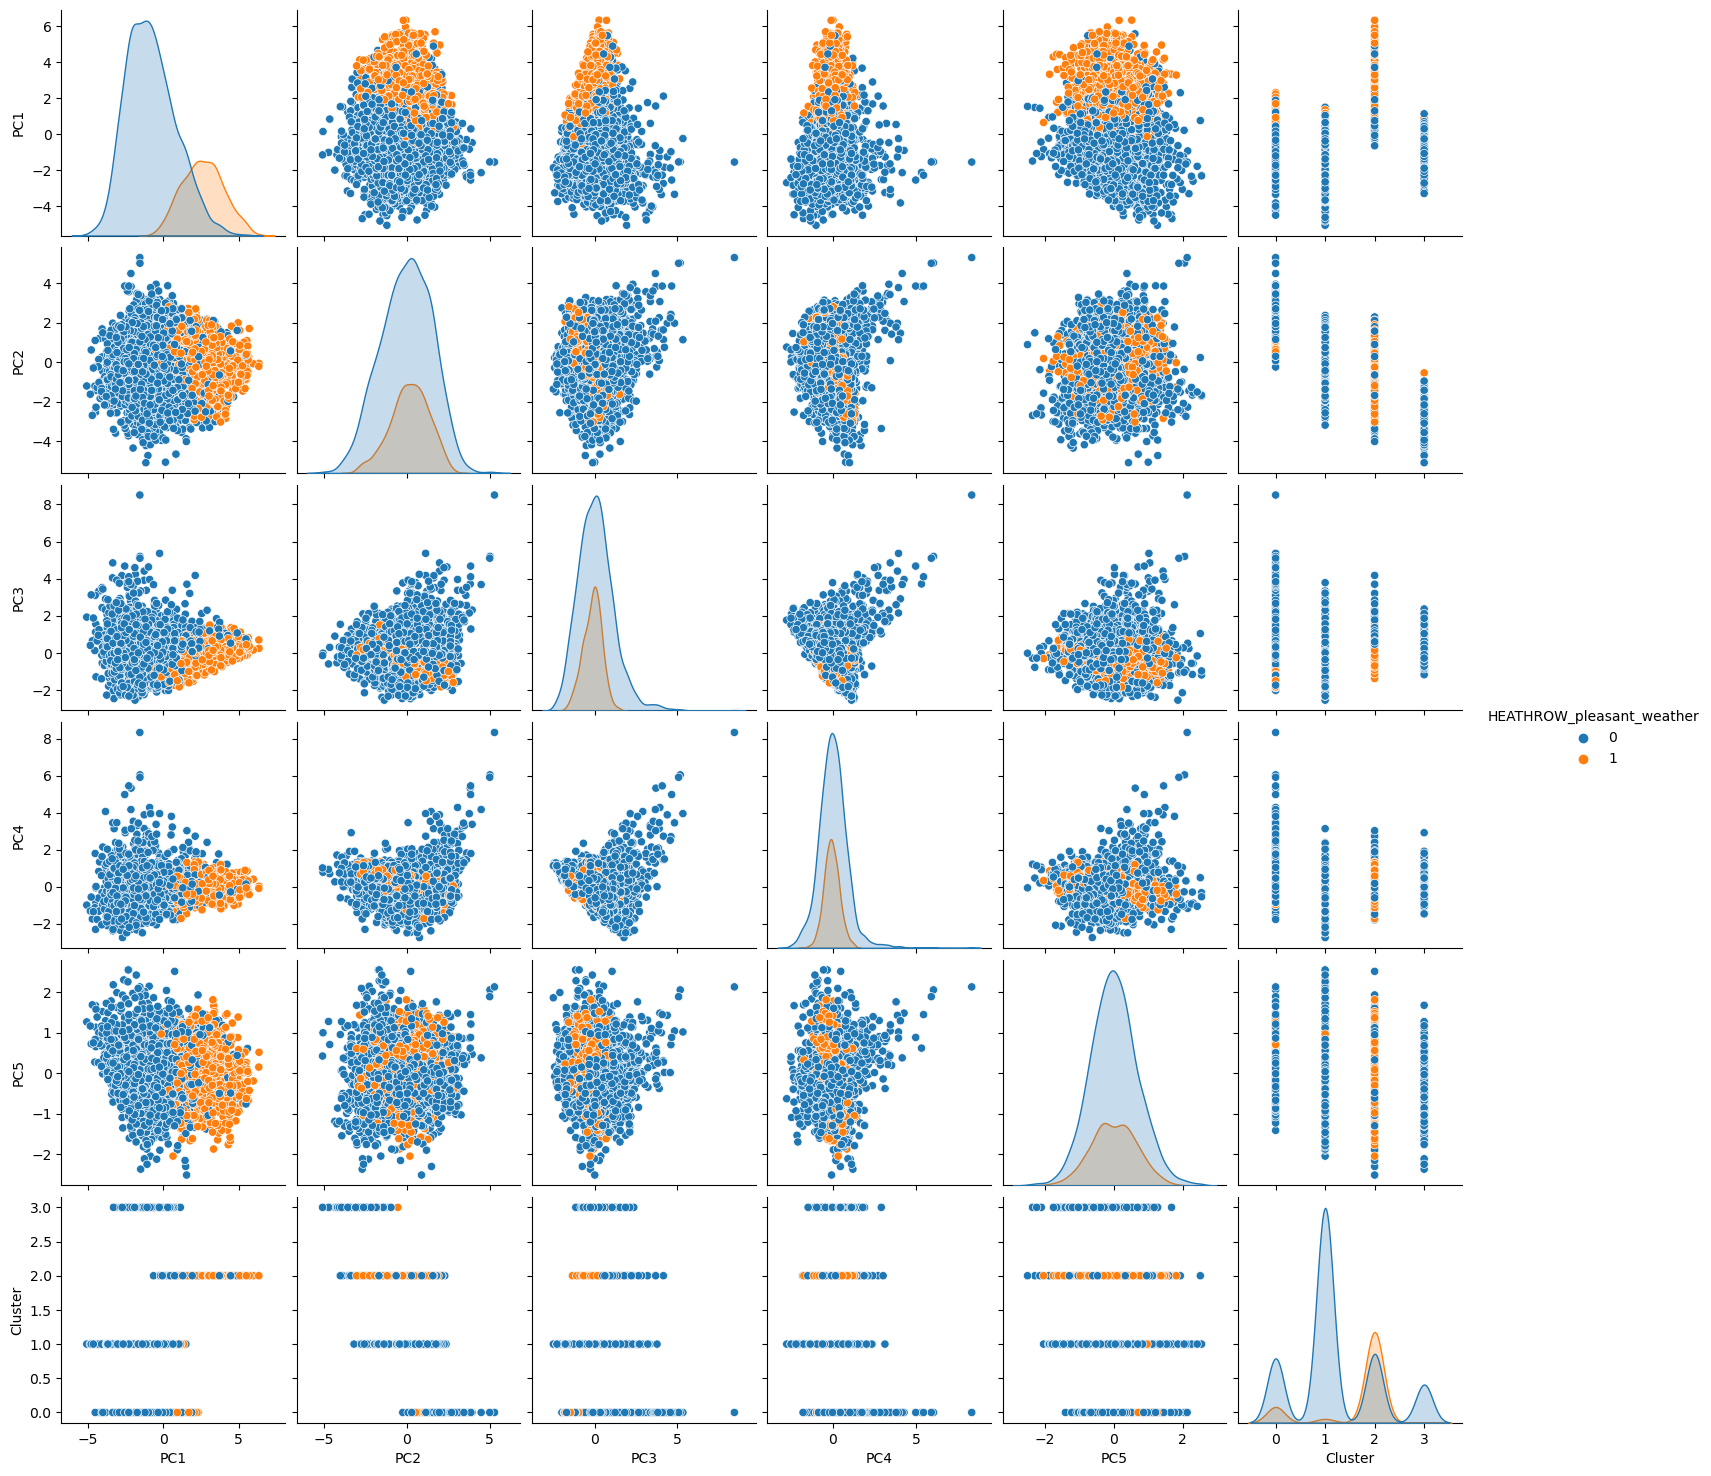

In [74]:
sns.pairplot(merged_heath4[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Cluster', 'HEATHROW_pleasant_weather']], hue = 'HEATHROW_pleasant_weather')

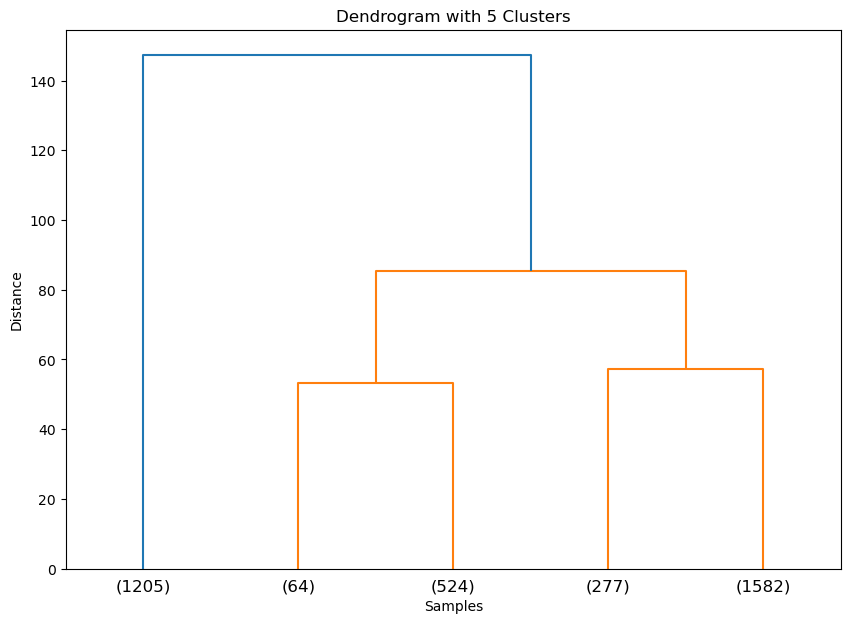

In [76]:
#Cut the dendrogram to 5 clusters
n_clusters = 5
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = cluster_model.fit_predict(pcaHeath10)

# Step 2: Assign cluster labels to the original DataFrame
Heath5C = pcaHeath10
Heath5C['Cluster'] = cluster_labels

plt.figure(figsize=(10, 7))
plt.title('Dendrogram with 5 Clusters')
dendrogram(W, truncate_mode='lastp', p=n_clusters, show_leaf_counts=True)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [77]:
merged_heath5 = pd.merge(Heath5C, HeathPleas10, left_index=True, right_index=True)
merged_heath5.head()

PC1       PC2       PC3       PC4       PC5  Cluster  \
0 -1.447181 -2.726699  1.231066 -0.906343 -0.510326        3   
1 -2.153218 -2.700722  0.341384 -0.284249 -0.071735        3   
2 -1.975850 -3.157563  0.089936  0.273019 -0.629006        3   
3 -1.994335 -4.337034  0.910451  0.262331 -1.187958        3   
4 -4.173134 -1.832375  0.589975 -0.758858  0.849049        0   

   HEATHROW_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


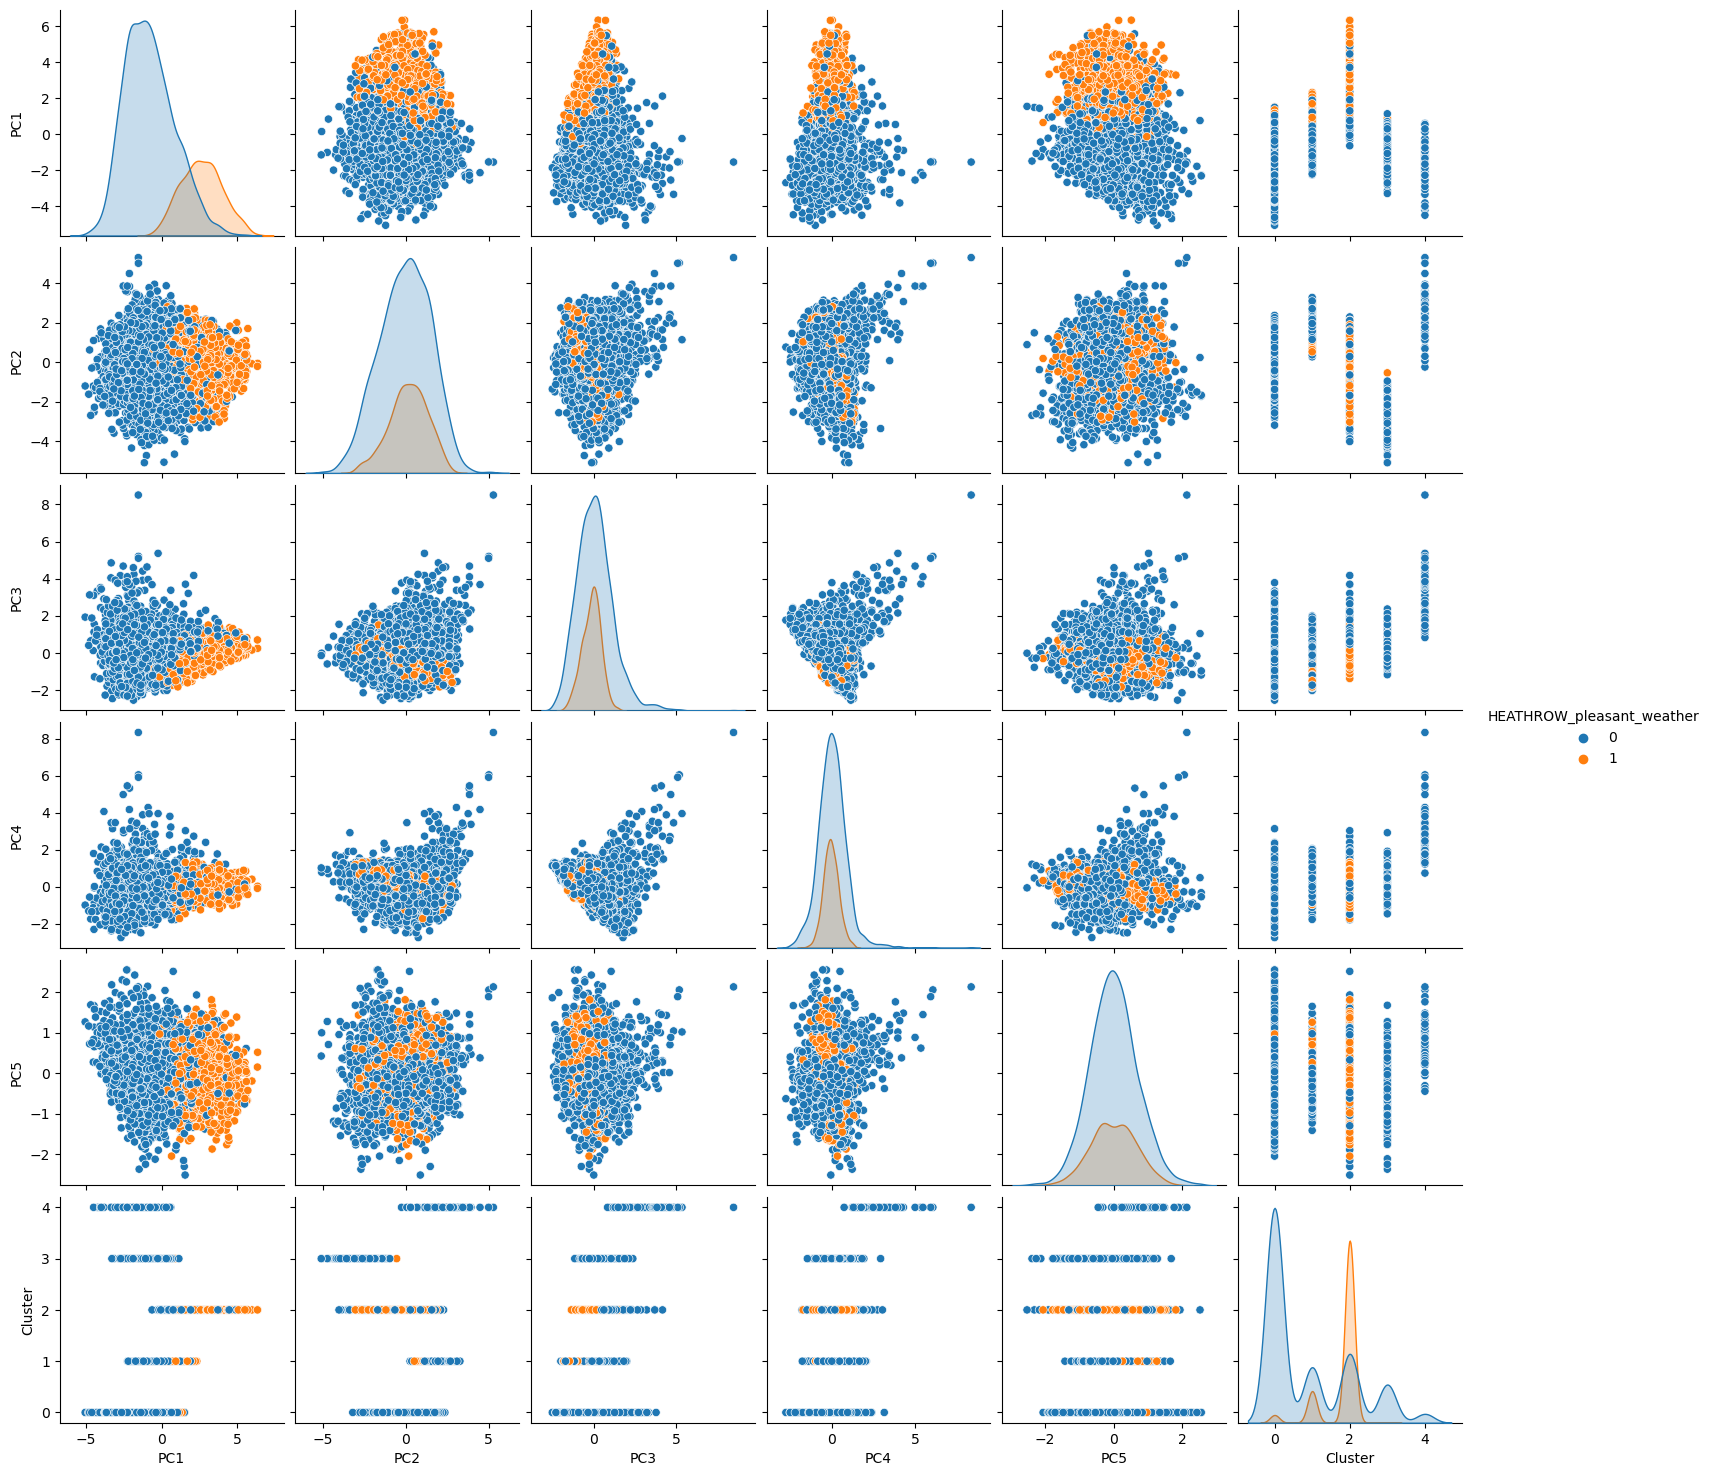

In [78]:
sns.pairplot(merged_heath5[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Cluster', 'HEATHROW_pleasant_weather']], hue = 'HEATHROW_pleasant_weather')

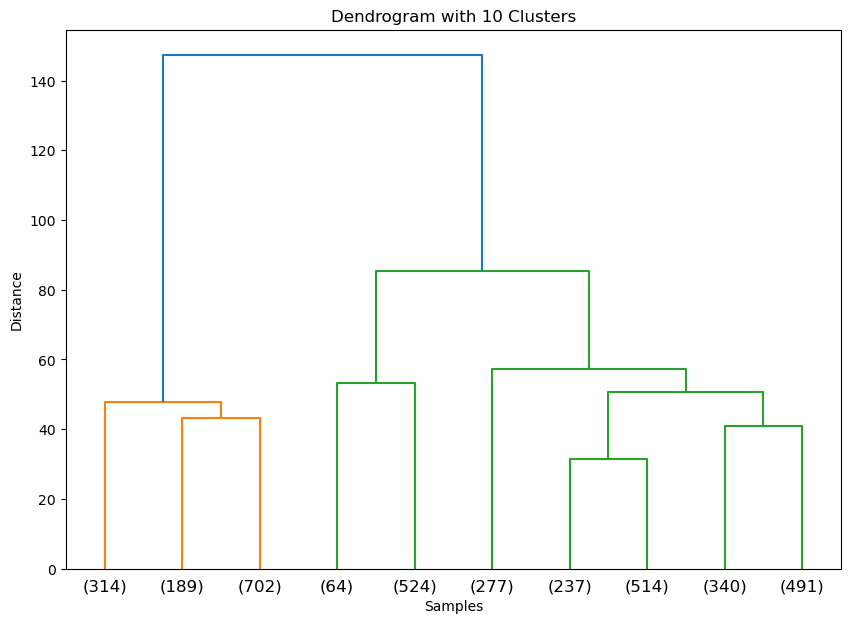

In [80]:
#Cut the dendrogram to 10 clusters
n_clusters = 10
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = cluster_model.fit_predict(pcaHeath10)

# Step 2: Assign cluster labels to the original DataFrame
Heath10C = pcaHeath10
Heath10C['Cluster'] = cluster_labels

plt.figure(figsize=(10, 7))
plt.title('Dendrogram with 10 Clusters')
dendrogram(W, truncate_mode='lastp', p=n_clusters, show_leaf_counts=True)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [81]:
merged_heath10 = pd.merge(Heath10C, HeathPleas10, left_index=True, right_index=True)
merged_heath10.head()

PC1       PC2       PC3       PC4       PC5  Cluster  \
0 -1.447181 -2.726699  1.231066 -0.906343 -0.510326        3   
1 -2.153218 -2.700722  0.341384 -0.284249 -0.071735        3   
2 -1.975850 -3.157563  0.089936  0.273019 -0.629006        3   
3 -1.994335 -4.337034  0.910451  0.262331 -1.187958        3   
4 -4.173134 -1.832375  0.589975 -0.758858  0.849049        6   

   HEATHROW_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


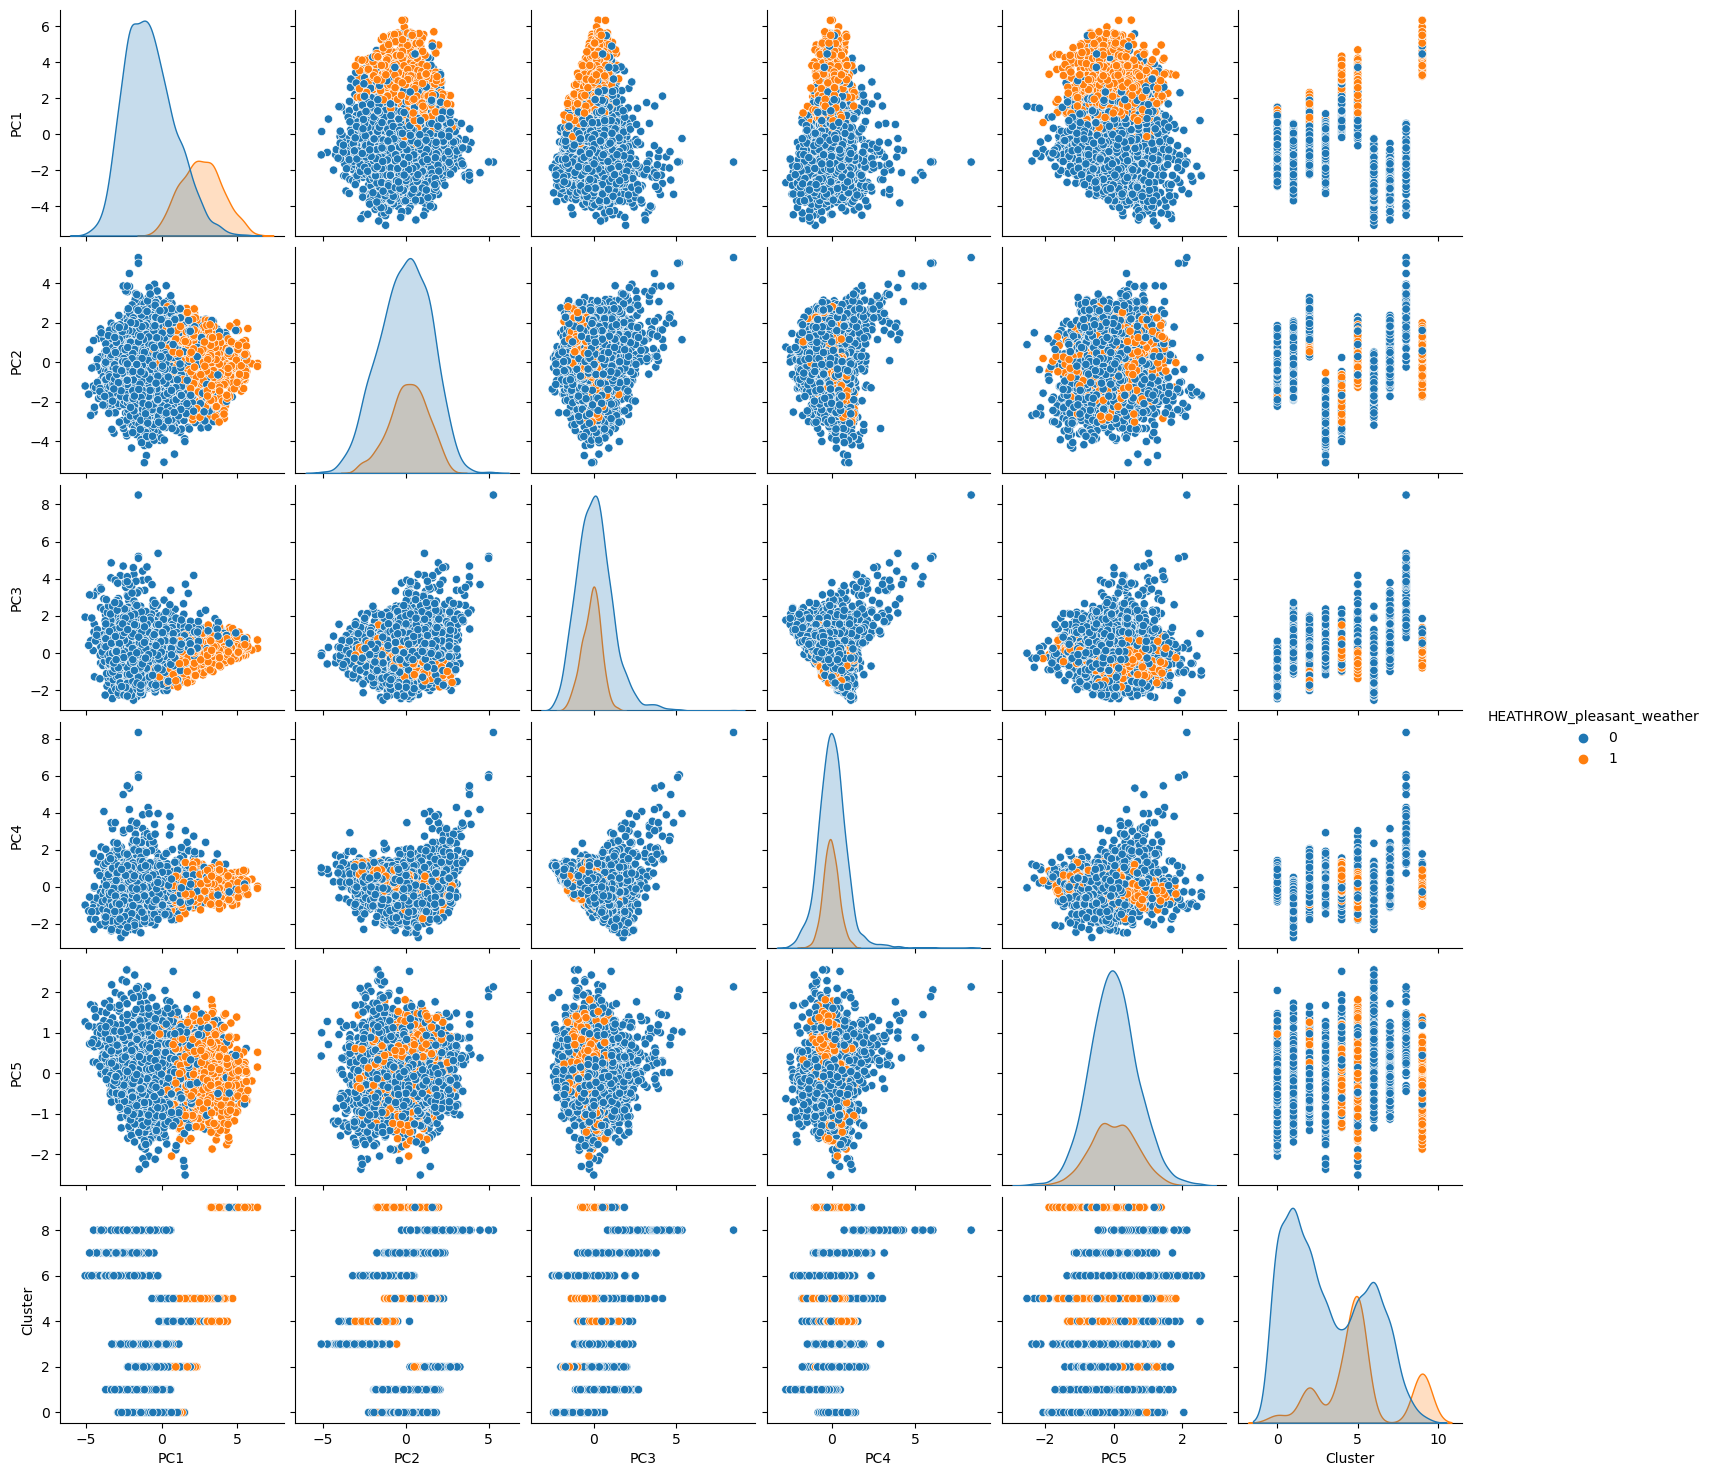

In [82]:
sns.pairplot(merged_heath10[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Cluster', 'HEATHROW_pleasant_weather']], hue = 'HEATHROW_pleasant_weather')